<a href="https://colab.research.google.com/github/hmatalonga/farmer-replication/blob/master/ReplicationPackage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Replication Package for "An Empirical Study of the Energy Consumption for Android Devices"

In this notebook, we will show the implementation and results for the RQs listed below. Each study case contains a different dataset for an Android model device collected from the [GreenHub](https://greenhubproject.org) repository.

## Reseach Questions:

- **RQ1:** How do the environments of mobile devices impact energy consumption?
  - Approach: We use non-linear regression models to find the association between the environments of the mobile devices (e.g., CPU, Network, Device Settings, Storage) and the power consumption (using the voltage as a proxy).
- **RQ2:** Is it possible to accurately predict the features of mobile devices that impact energy consumption?
  - Approach:
- **RQ3:** Do the energy consumption patterns hold true for all mobile devices?
  - Approach: We will use a mixed-effect modeling technique to investigate the energy consumption patterns while considering the contextual factors like mobile devices.

**Previous iteration of RQs:**

- RQ1: How do the environments of mobile devices impact energy consumption?
  - Approach: We use non-linear regression models to find the association between the environments of the mobile devices (e.g., CPU, Network, Device Settings, Storage) and the power consumption (using the voltage as a proxy).
  - Finding: When NFC is enabled, it has a tendency to have the highest impact on Mobile energy consumption.

- RQ2: How do the environments of mobile devices impact energy consumption over time? 
  - Motivation: The energy may not be linearly consumed over time for each device.
  - Approach: By considering the chronological order, we will build a time-series analysis for each device to understand the impact of each factor over time.

- RQ3: Do the energy consumption patterns hold true for all mobile devices? 
  - Motivation: Each mobile device may have different behaviors of energy consumption patterns.
  - Approach: We will use a mixed-effect modeling technique to investigate the energy consumption patterns while considering the contextual factors like mobile devices.

- RQ4: How do energy consumption factors impact the remaining battery lifetime?
  - Motivation: Understanding the factors that impact the remaining battery life allows us to determine ways to improve battery life.
  - Approach: We will use a cox-proportional hazard model (survival analysis) to understand the relationship between factors and battery level or battery capacity. 

## Model devices:
1. [OnePlus One](https://www.gsmarena.com/oneplus_one-6327.php)
2. [BQ Aquaris M5](https://www.gsmarena.com/bq_aquaris_m5-7839.php)
3. [LG Nexus 5](https://www.gsmarena.com/lg_nexus_5-5705.php)
4. [Samsung Galaxy J2 Prime](https://www.gsmarena.com/samsung_galaxy_j2_prime-8424.php)
5. [Samsung Galaxy J5](https://www.gsmarena.com/samsung_galaxy_j5_(2016)-7869.php)
6. [Samsung Galaxy S5](https://www.gsmarena.com/samsung_galaxy_s5-6033.php)
7. [Samsung Galaxy S6](https://www.gsmarena.com/samsung_galaxy_s6-6849.php)
8. [Samsung Galaxy S6 edge](https://www.gsmarena.com/samsung_galaxy_s6_edge-7079.php)
9. [Samsung Galaxy S7](https://www.gsmarena.com/samsung_galaxy_s7-7821.php)
10. [Samsung Galaxy S7 edge](https://www.gsmarena.com/samsung_galaxy_s7_edge-7945.php)

In the list above, links are provided for the full specifications of each model device in order to access additional information.

## Install and load necessary R packages

In [0]:
install.packages("rms")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(rms)

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




## 1.1) [OnePlus One](https://www.gsmarena.com/oneplus_one-6327.php) (codename: a0001)

### 1.1.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-a0001.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'timezone', 'temperature', 'wifi_signal_strength', 'wifi_link_speed',
'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled', 'location_enabled',  'power_saver_enabled',
'nfc_enabled', 'unknown_sources', 'developer_mode', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 222854

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on       temperature    wifi_signal_strength
 Min.   : -1.0     Min.   :0.0000   Min.   : 9.50   Min.   :-127.0      
 1st Qu.: -1.0     1st Qu.:0.0000   1st Qu.:23.90   1st Qu.:-127.0      
 Median : -1.0     Median :0.0000   Median :27.70   Median : -66.0      
 Mean   : 39.8     Mean   :0.2938   Mean   :27.78   Mean   : -78.8      
 3rd Qu.: 62.0     3rd Qu.:1.0000   3rd Qu.:31.60   3rd Qu.: -53.0      
 Max.   :255.0     Max.   :1.0000   Max.   :58.70   Max.   :  -8.0      
 wifi_link_speed   cpu_usage           up_time          sleep_time     
 Min.   : -1     Min.   :-16.1290   Min.   :     77   Min.   :      0  
 1st Qu.: -1     1st Qu.:  0.0500   1st Qu.:  77831   1st Qu.:   9955  
 Median : 65     Median :  0.1500   Median : 234274   Median :  53752  
 Mean   : 69     Mean   :  0.3735   Mean   : 541075   Mean   : 189339  
 3rd Qu.: 72     3rd Qu.:  0.6890   3rd Qu.: 637642   3rd Qu.: 177784  
 Max.   :433     Max.   :695.0000   Max.   :4640005   Max

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status               timezone       network_type   
 disconnected: 88602   atlantic/madeira:222854   mobile :    80  
 wifi        :134252                             unknown: 46549  
                                                 wifi   :176225  
 mobile_network_type    mobile_data_status mobile_data_activity
 lte :163547         disconnected:222854   inout: 28815        
 utms: 59307                               none :194039        
                                                               
   wifi_status      wifi_ap_status  
 disabled: 44968   disabled:222854  
 enabled :177886                    
                                    

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_data_status', 'wifi_ap_status', 'timezone')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

In [0]:
features <- c(ind_vars,cat_vars)
# Number of features in the data
print(length(features))
# List of features
print(features)

[1] 23
 [1] "screen_brightness"    "screen_on"            "temperature"         
 [4] "wifi_signal_strength" "wifi_link_speed"      "cpu_usage"           
 [7] "up_time"              "sleep_time"           "bluetooth_enabled"   
[10] "location_enabled"     "power_saver_enabled"  "nfc_enabled"         
[13] "unknown_sources"      "developer_mode"       "free"                
[16] "free_external"        "free_system"          "apps_total"          
[19] "network_status"       "network_type"         "mobile_network_type" 
[22] "mobile_data_activity" "wifi_status"         


### 1.1.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-1.a)** Correlation analysis will output the hierarchical clusters

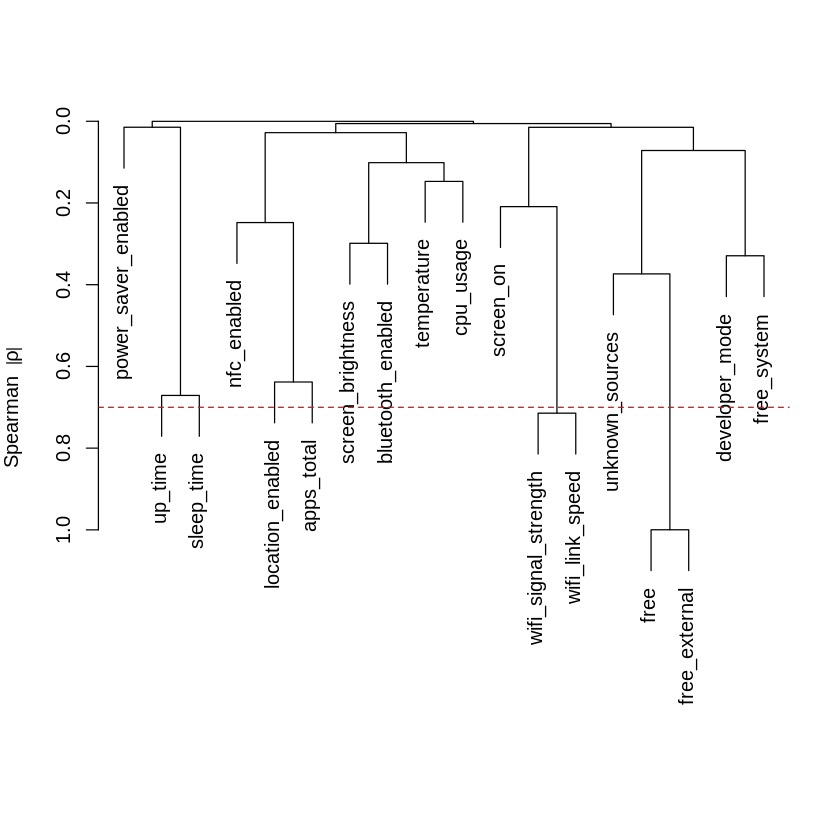

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external','wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

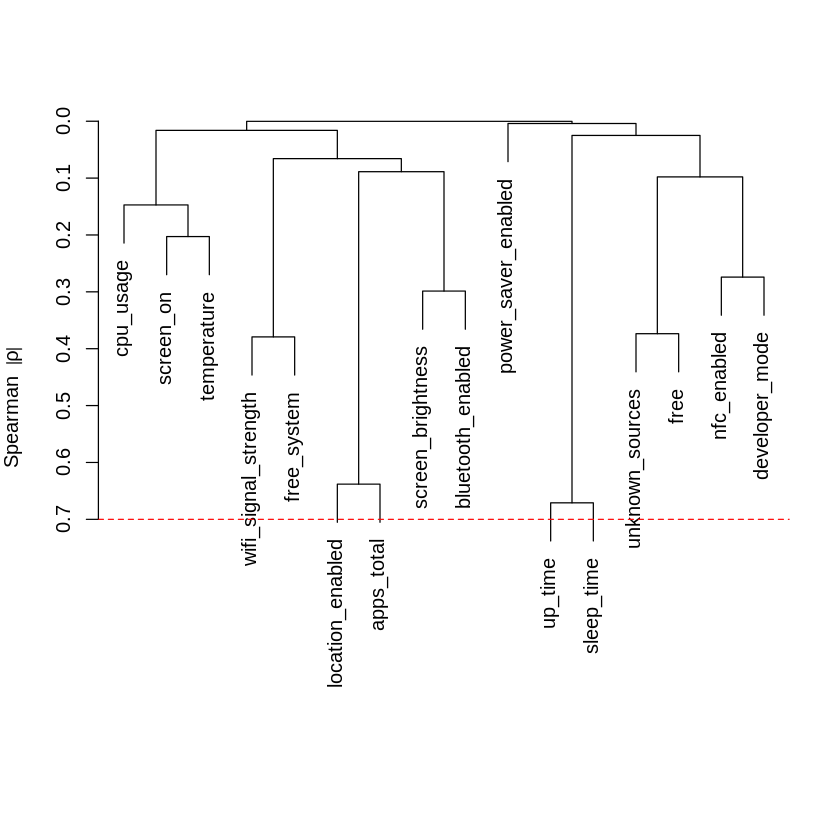

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-1.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 222854 	p: 16 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on          temperature 
               0.256                0.139                0.150 
wifi_signal_strength            cpu_usage              up_time 
               0.344                0.002                0.508 
          sleep_time    bluetooth_enabled     location_enabled 
               0.487                0.441                0.616 
 power_saver_enabled          nfc_enabled      unknown_sources 
               0.005                0.360                0.636 
      developer_mode                 free          free_system 
               0.519                0.520                0.486 
          apps_total 
               0.616 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

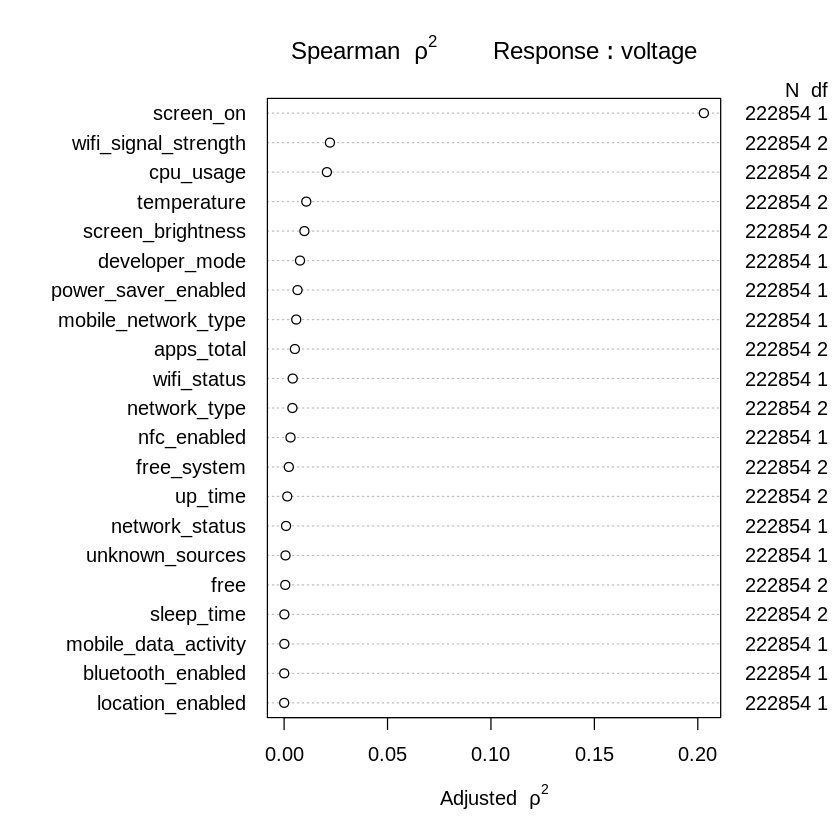

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs  222854    LR chi2    64424.60    R2       0.251    
 sigma0.1709    d.f.             22    R2 adj   0.251    
 d.f. 222831    Pr(> chi2)   0.0000    g        0.107    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -0.96777 -0.12630  0.00339  0.13984  1.11851 
 
 
                           Coef    S.E.   t       Pr(>|t|)
 Intercept                  3.8221 0.0200  190.95 <0.0001 
 screen_brightness         -0.0002 0.0000  -27.43 <0.0001 
 screen_on                 -0.1866 0.0009 -216.89 <0.0001 
 temperature                0.0000 0.0001    0.30 0.7650  
 wifi_signal_strength      -0.0006 0.0000  -33.63 <0.0001 
 cpu_usage                 -0.0015 0.0002   -6.28 <0.0001 
 up_time                    0.0000 0.0

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.2511   0.2524 0.2364   0.0160          0.2351 40
MSE           0.0292   0.0292 0.0298  -0.0006          0.0298 40
g             0.1067   0.1072 0.1015   0.0057          0.1010 40
Intercept     0.0000   0.0000 0.2127  -0.2127          0.2127 40
Slope         1.0000   1.0000 0.9469   0.0531          0.9469 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.000,62.000,63.000,-0.0102361712,0.0003732391,-0.0109677103,-0.0095046322,1
screen_on,0.000,1.000,1.000,-0.1866024599,0.0008603420,-0.1882887085,-0.1849162114,1
temperature,23.899,31.600,7.701,0.0001719510,0.0005752371,-0.0009554991,0.0012994012,1
wifi_signal_strength,-127.000,-53.000,74.000,-0.0434881749,0.0012932300,-0.0460228729,-0.0409534770,1
cpu_usage,0.050,0.689,0.639,-0.0009561471,0.0001521900,-0.0012544356,-0.0006578587,1
up_time,77831.250,637642.500,559811.250,-0.0012955002,0.0003798620,-0.0020400201,-0.0005509803,1
sleep_time,9955.250,177784.000,167828.750,0.0012672325,0.0002211358,0.0008338120,0.0017006530,1
bluetooth_enabled,0.000,1.000,1.000,0.0228670221,0.0011594581,0.0205945136,0.0251395305,1
location_enabled,0.000,1.000,1.000,-0.0080232221,0.0012607468,-0.0104942538,-0.0055521904,1
power_saver_enabled,0.000,1.000,1.000,-0.3210235737,0.0070460279,-0.3348336096,-0.3072135378,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,2.197808e+01,2.197808e+01,7.521439e+02,0.000000e+00
screen_on,1,1.374616e+03,1.374616e+03,4.704272e+04,0.000000e+00
temperature,1,2.610987e-03,2.610987e-03,8.935435e-02,7.649996e-01
wifi_signal_strength,1,3.304302e+01,3.304302e+01,1.130813e+03,0.000000e+00
cpu_usage,1,1.153364e+00,1.153364e+00,3.947094e+01,3.329780e-10
up_time,1,3.398695e-01,3.398695e-01,1.163117e+01,6.485586e-04
sleep_time,1,9.595851e-01,9.595851e-01,3.283935e+01,1.000979e-08
bluetooth_enabled,1,1.136575e+01,1.136575e+01,3.889637e+02,0.000000e+00
location_enabled,1,1.183398e+00,1.183398e+00,4.049877e+01,1.967394e-10
power_saver_enabled,1,6.065604e+01,6.065604e+01,2.075798e+03,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(22,23)], decreasing=TRUE)

screen_on          free_system  power_saver_enabled 
        1.374616e+03         7.465004e+01         6.065604e+01 
         nfc_enabled       developer_mode wifi_signal_strength 
        5.301615e+01         4.021740e+01         3.304302e+01 
                free    screen_brightness      unknown_sources 
        2.675554e+01         2.197808e+01         1.980447e+01 
   bluetooth_enabled         network_type           apps_total 
        1.136575e+01         6.956450e+00         5.083299e+00 
      network_status          wifi_status     location_enabled 
        3.236382e+00         2.829786e+00         1.183398e+00 
           cpu_usage           sleep_time  mobile_network_type 
        1.153364e+00         9.595851e-01         5.601704e-01 
mobile_data_activity              up_time          temperature 
        4.039378e-01         3.398695e-01         2.610987e-03

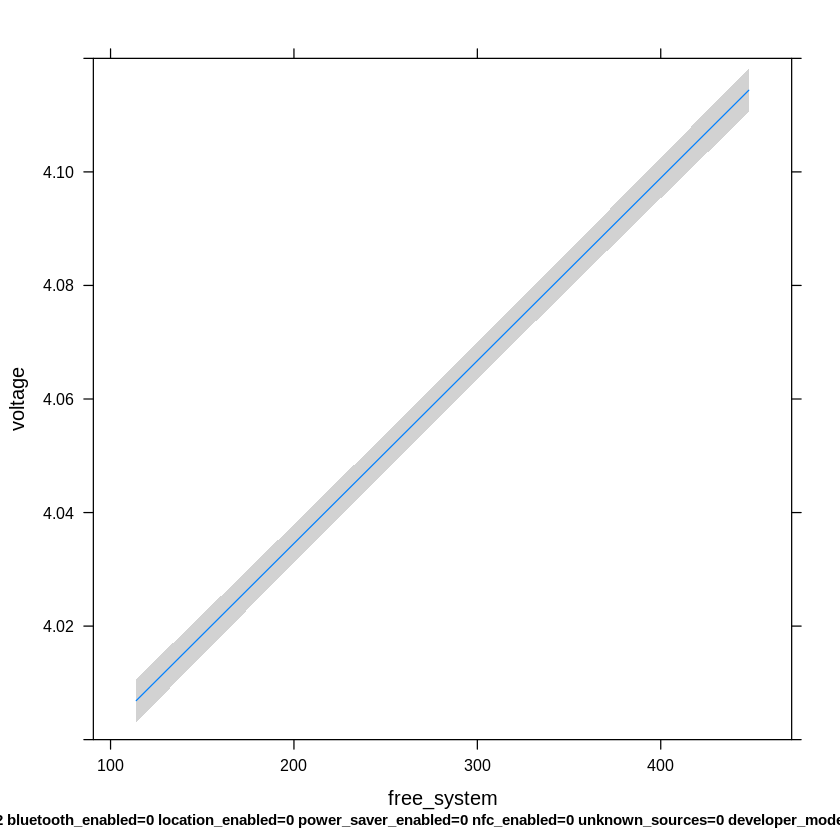

In [0]:
predict <- Predict(fit, free_system)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1425067 0.1423289 0.1428241 0.1426717 0.1425496 0.1426980 0.1424287
 [8] 0.1425582 0.1424163 0.1425055


In [0]:
print(sum(mae) / steps)

[1] 0.1425488


## 1.2) [BQ Aquaris M5](https://www.gsmarena.com/bq_aquaris_m5-7839.php) (codename: aquaris-m5)

### 1.2.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-aquaris-m5.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'timezone', 'temperature', 'wifi_signal_strength', 'wifi_link_speed',
'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled', 'location_enabled',  'power_saver_enabled',
'nfc_enabled', 'unknown_sources', 'free', 'free_external', 'free_system', 'network_status',
'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 118932

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on       temperature    wifi_signal_strength
 Min.   : -1.00    Min.   :0.0000   Min.   : 5.00   Min.   :-127.00     
 1st Qu.: 10.00    1st Qu.:0.0000   1st Qu.:24.00   1st Qu.:-127.00     
 Median : 19.00    Median :0.0000   Median :27.00   Median : -82.00     
 Mean   : 65.34    Mean   :0.3524   Mean   :27.93   Mean   : -90.04     
 3rd Qu.:130.00    3rd Qu.:1.0000   3rd Qu.:31.00   3rd Qu.: -53.00     
 Max.   :255.00    Max.   :1.0000   Max.   :55.00   Max.   : -11.00     
 wifi_link_speed   cpu_usage         up_time          sleep_time     
 Min.   :-1.0    Min.   :0.0700   Min.   :     54   Min.   :      0  
 1st Qu.:-1.0    1st Qu.:0.2700   1st Qu.:  76320   1st Qu.:  48081  
 Median : 2.0    Median :0.3890   Median : 220566   Median : 142256  
 Mean   :29.8    Mean   :0.4193   Mean   : 374412   Mean   : 259997  
 3rd Qu.:65.0    3rd Qu.:0.5290   3rd Qu.: 486637   3rd Qu.: 343759  
 Max.   :72.0    Max.   :1.0000   Max.   :2929524   Max.   :2306707  

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status              timezone       network_type  
 disconnected:16955   atlantic/madeira:118932   mobile :43717  
 lte         :41621                             unknown:13862  
 wifi        :60356                             wifi   :61353  
 mobile_network_type    mobile_data_status mobile_data_activity
 lte:118932          connected   :43671    inout:21936         
                     disconnected:75261    none :96996         
                                                               
   wifi_status     wifi_ap_status  
 disabled:42889   disabled:118932  
 enabled :76043                    
                                   

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_network_type', 'wifi_ap_status', 'timezone')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.2.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-2.a)** Correlation analysis will output the hierarchical clusters

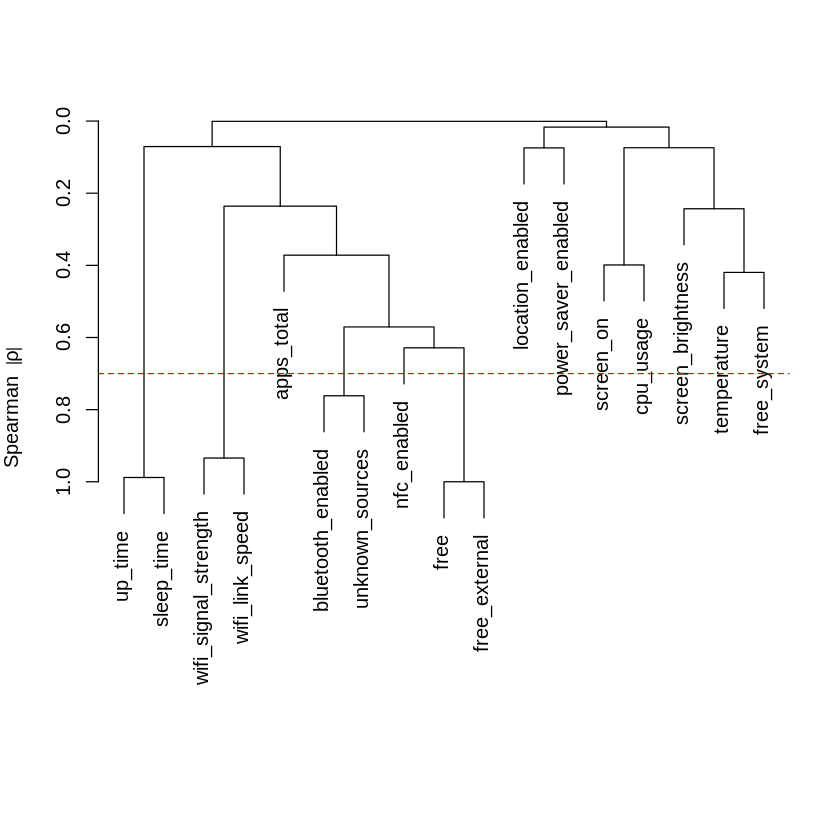

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed', 'unknown_sources')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

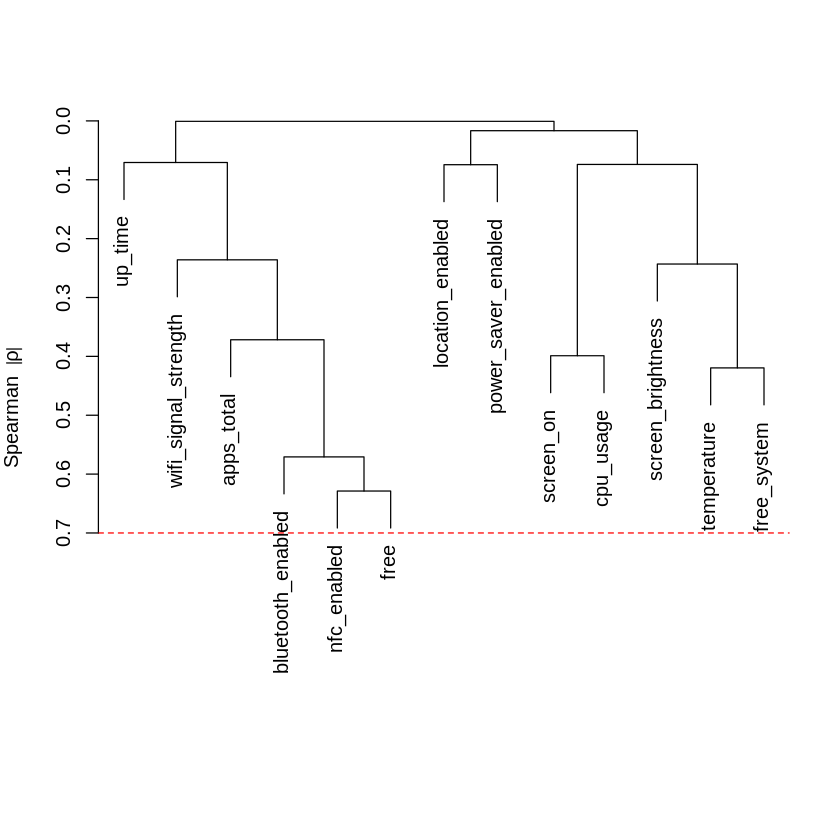

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-2.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 118932 	p: 13 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on          temperature 
               0.237                0.278                0.297 
wifi_signal_strength            cpu_usage              up_time 
               0.174                0.293                0.103 
   bluetooth_enabled     location_enabled  power_saver_enabled 
               0.547                0.290                0.020 
         nfc_enabled                 free          free_system 
               0.653                0.727                0.303 
          apps_total 
               0.328 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

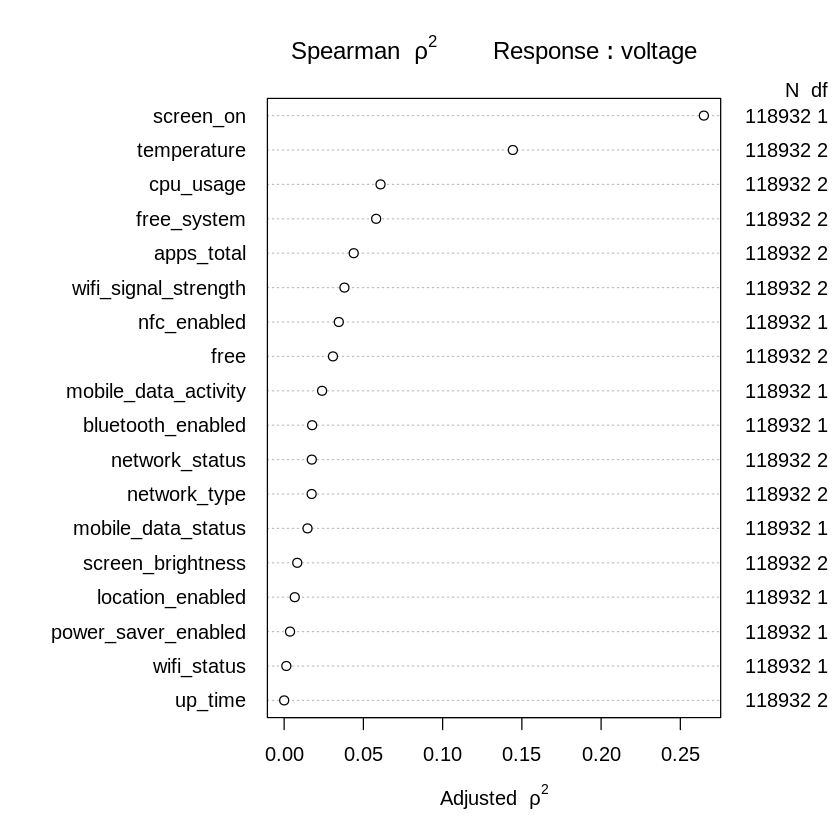

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs  118932    LR chi2    58764.90    R2       0.390    
 sigma0.1942    d.f.             20    R2 adj   0.390    
 d.f. 118911    Pr(> chi2)   0.0000    g        0.177    
 
 Residuals
 
       Min        1Q    Median        3Q       Max 
 -0.807132 -0.137651  0.002231  0.150445  0.736316 
 
 
                                 Coef    S.E.   t       Pr(>|t|)
 Intercept                        4.3161 0.0102  422.91 <0.0001 
 screen_brightness                0.0002 0.0000   21.50 <0.0001 
 screen_on                       -0.2050 0.0014 -144.19 <0.0001 
 temperature                     -0.0066 0.0001  -51.11 <0.0001 
 wifi_signal_strength             0.0004 0.0000    7.73 <0.0001 
 cpu_usage                       -0.1541 0.0038  -4

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.3899   0.3899 0.3898   0.0001          0.3898 40
MSE           0.0377   0.0377 0.0377   0.0000          0.0377 40
g             0.1769   0.1770 0.1769   0.0001          0.1768 40
Intercept     0.0000   0.0000 0.0013  -0.0013          0.0013 40
Slope         1.0000   1.0000 0.9997   0.0003          0.9997 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,10.00,130.000,120.000,0.025175767,0.0011712110,0.022880212,0.027471322,1
screen_on,0.00,1.000,1.000,-0.204976974,0.0014215540,-0.207763197,-0.202190751,1
temperature,24.00,31.000,7.000,-0.045909037,0.0008982486,-0.047669590,-0.044148484,1
wifi_signal_strength,-127.00,-53.000,74.000,0.026455039,0.0034201977,0.019751506,0.033158571,1
cpu_usage,0.27,0.529,0.259,-0.039919545,0.0009914217,-0.041862715,-0.037976374,1
up_time,76320.50,486636.750,410316.250,0.003238642,0.0005492884,0.002162045,0.004315238,1
bluetooth_enabled,0.00,1.000,1.000,0.013560985,0.0017212942,0.010187276,0.016934694,1
location_enabled,0.00,1.000,1.000,0.012428084,0.0017116344,0.009073308,0.015782860,1
power_saver_enabled,0.00,1.000,1.000,-0.202591069,0.0149686379,-0.231929359,-0.173252779,1
nfc_enabled,0.00,1.000,1.000,-0.026825040,0.0019346637,-0.030616950,-0.023033130,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,1.743032e+01,1.743032e+01,4.620565e+02,0.000000e+00
screen_on,1,7.843207e+02,7.843207e+02,2.079139e+04,0.000000e+00
temperature,1,9.854021e+01,9.854021e+01,2.612181e+03,0.000000e+00
wifi_signal_strength,1,2.256964e+00,2.256964e+00,5.982937e+01,1.032507e-14
cpu_usage,1,6.115959e+01,6.115959e+01,1.621266e+03,0.000000e+00
up_time,1,1.311400e+00,1.311400e+00,3.476362e+01,3.722655e-09
bluetooth_enabled,1,2.341437e+00,2.341437e+00,6.206864e+01,3.330669e-15
location_enabled,1,1.988825e+00,1.988825e+00,5.272133e+01,3.843592e-13
power_saver_enabled,1,6.910131e+00,6.910131e+00,1.831791e+02,0.000000e+00
nfc_enabled,1,7.252371e+00,7.252371e+00,1.922515e+02,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(19,20)], decreasing=TRUE)

screen_on          temperature          free_system 
        7.843207e+02         9.854021e+01         6.753671e+01 
           cpu_usage       network_status                 free 
        6.115959e+01         3.943483e+01         2.929417e+01 
         wifi_status    screen_brightness           apps_total 
        1.969024e+01         1.743032e+01         1.322844e+01 
         nfc_enabled  power_saver_enabled mobile_data_activity 
        7.252371e+00         6.910131e+00         5.274667e+00 
        network_type    bluetooth_enabled wifi_signal_strength 
        3.259890e+00         2.341437e+00         2.256964e+00 
    location_enabled              up_time   mobile_data_status 
        1.988825e+00         1.311400e+00         2.780081e-03

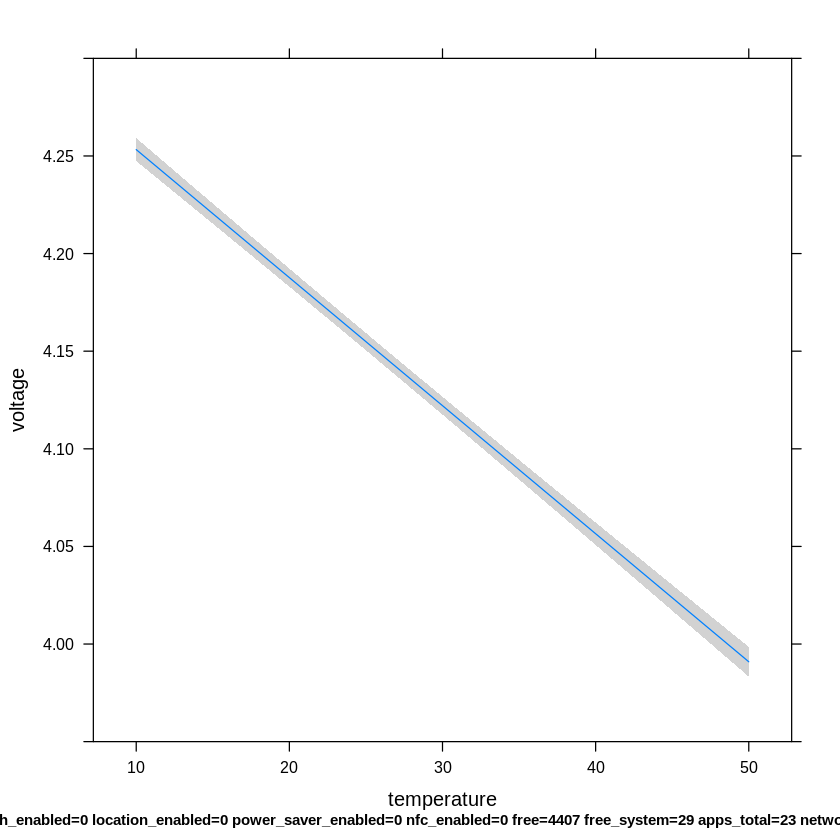

In [0]:
predict <- Predict(fit, temperature)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1578367 0.1591709 0.1597557 0.1597188 0.1587075 0.1601629 0.1591519
 [8] 0.1587843 0.1597542 0.1589611


In [0]:
print(sum(mae) / steps)

[1] 0.1592004


## 1.3) [LG Nexus 5](https://www.gsmarena.com/lg_nexus_5-5705.php) (codename: nexus5)

### 1.3.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-nexus5.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'timezone', 
'temperature', 'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time',
'sleep_time', 'bluetooth_enabled', 'location_enabled', 'nfc_enabled', 'developer_mode', 'free', 'free_external',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 84096

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on       temperature     wifi_signal_strength
 Min.   : -1.00    Min.   :0.0000   Min.   :-30.00   Min.   :-127.00     
 1st Qu.: -1.00    1st Qu.:0.0000   1st Qu.: 26.30   1st Qu.:-127.00     
 Median : -1.00    Median :0.0000   Median : 29.80   Median :-127.00     
 Mean   : 20.89    Mean   :0.3229   Mean   : 29.53   Mean   : -99.32     
 3rd Qu.: 82.00    3rd Qu.:1.0000   3rd Qu.: 33.60   3rd Qu.: -72.00     
 Max.   :255.00    Max.   :1.0000   Max.   : 47.60   Max.   : -23.00     
 wifi_link_speed    cpu_usage         up_time          sleep_time     
 Min.   : -1.00   Min.   :0.0000   Min.   :     35   Min.   :      0  
 1st Qu.: -1.00   1st Qu.:0.4790   1st Qu.:  22373   1st Qu.:  10172  
 Median : -1.00   Median :0.6490   Median :  61832   Median :  27710  
 Mean   : 18.99   Mean   :0.6364   Mean   : 278786   Mean   : 174006  
 3rd Qu.: 26.00   3rd Qu.:0.8000   3rd Qu.: 332742   3rd Qu.: 115599  
 Max.   :433.00   Max.   :1.0000   Max.   :3156493   Max

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status              timezone      network_type  
 disconnected:18137   africa/tunis    :11725   mobile :27733  
 lte         :27314   atlantic/madeira:72371   unknown:17512  
 wifi        :38645                            wifi   :38851  
 mobile_network_type    mobile_data_status mobile_data_activity
 0  :12442           connected   :27420    inout:27519         
 lte:71654           disconnected:56676    none :56577         
                                                               
   wifi_status     wifi_ap_status 
 disabled:24133   disabled:84096  
 enabled :59963                   
                                  

In [0]:
#Remove constant categorical variables
reject_vars <- c('wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.3.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-3.a)** Correlation analysis will output the hierarchical clusters

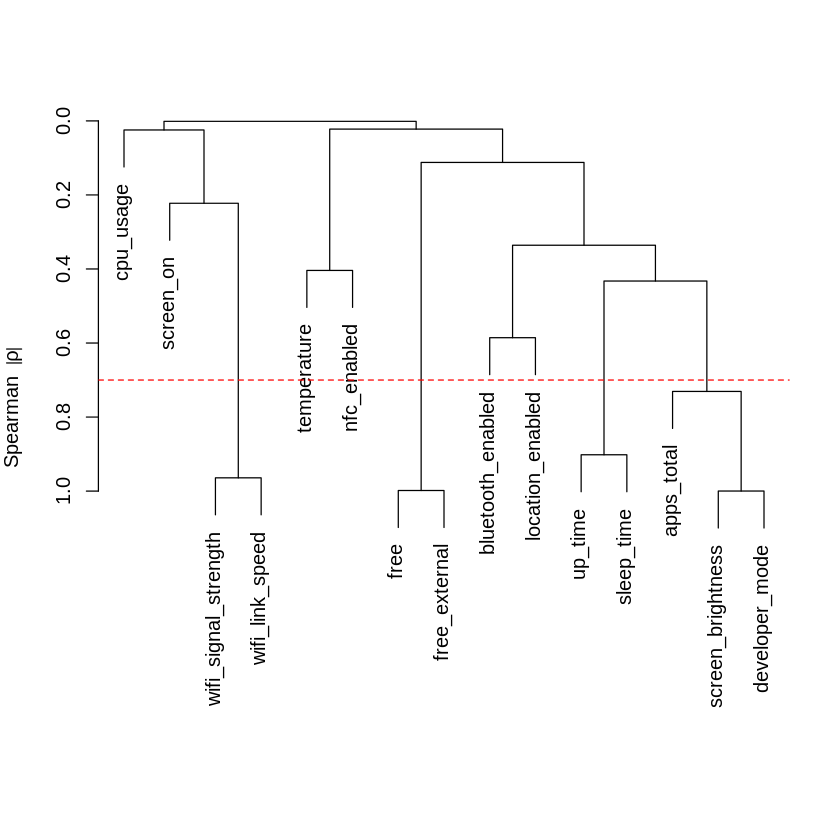

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed', 'developer_mode')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

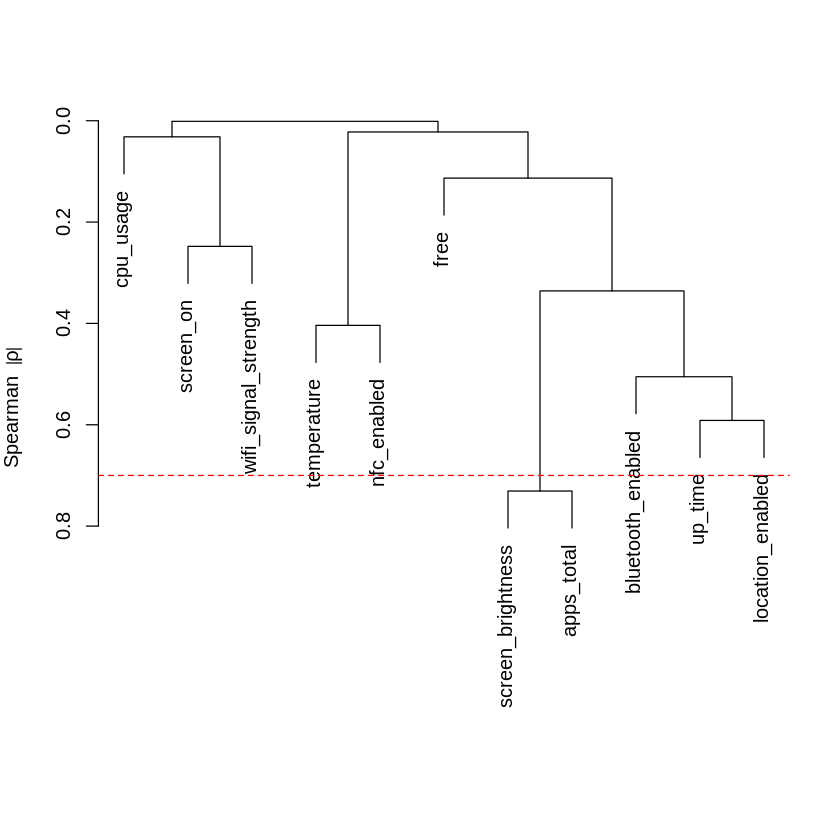

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

In [0]:
#Remove the remaining highly correlated variables from the hierarchical clusters
reject_vars <- c('screen_brightness') # or 'app_total'

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

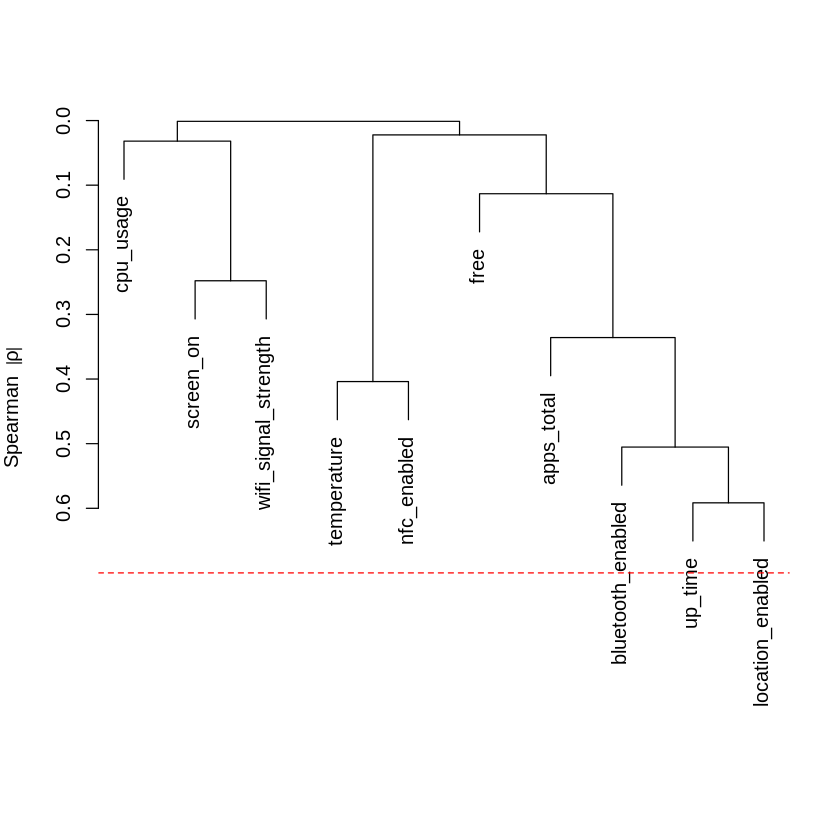

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-3.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 84096 	p: 10 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

           screen_on          temperature wifi_signal_strength 
               0.149                0.168                0.122 
           cpu_usage              up_time    bluetooth_enabled 
               0.049                0.370                0.372 
    location_enabled          nfc_enabled                 free 
               0.725                0.592                0.209 
          apps_total 
               0.514 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

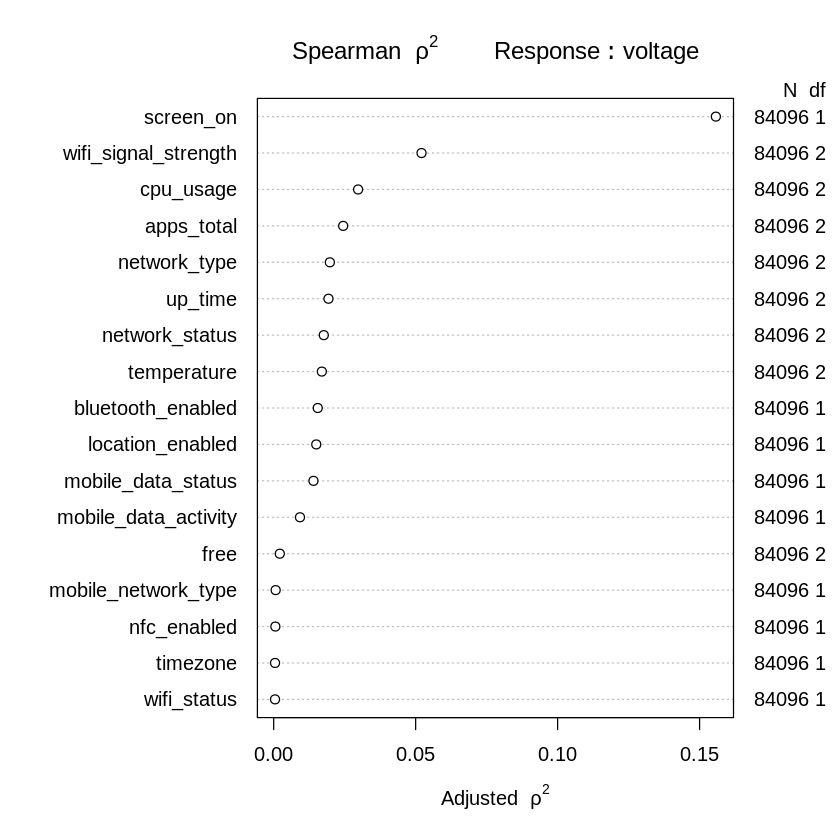

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   84096    LR chi2    22107.61    R2       0.231    
 sigma0.1862    d.f.             19    R2 adj   0.231    
 d.f.  84076    Pr(> chi2)   0.0000    g        0.115    
 
 Residuals
 
       Min        1Q    Median        3Q       Max 
 -0.939636 -0.130631 -0.007677  0.130018  0.773937 
 
 
                                 Coef    S.E.   t       Pr(>|t|)
 Intercept                        3.4031 0.0134  254.12 <0.0001 
 screen_on                       -0.1661 0.0015 -108.85 <0.0001 
 temperature                      0.0004 0.0001    3.47 0.0005  
 wifi_signal_strength            -0.0027 0.0001  -46.08 <0.0001 
 cpu_usage                       -0.0801 0.0031  -25.82 <0.0001 
 up_time                          0.0000 0.0000    

In [0]:
validate(fit)

          index.orig training    test optimism index.corrected  n
R-square      0.2312   0.2308  0.2310  -0.0002          0.2313 40
MSE           0.0347   0.0346  0.0347   0.0000          0.0347 40
g             0.1153   0.1152  0.1153  -0.0001          0.1154 40
Intercept     0.0000   0.0000 -0.0034   0.0034         -0.0034 40
Slope         1.0000   1.0000  1.0009  -0.0009          1.0009 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_on,0.000,1.000,1.000,-0.166074186,0.0015257082,-0.169064562,-0.163083810,1
temperature,26.299,33.599,7.300,0.002670705,0.0007686904,0.001164078,0.004177332,1
wifi_signal_strength,-127.000,-72.000,55.000,-0.149797093,0.0032506413,-0.156168325,-0.143425862,1
cpu_usage,0.479,0.800,0.321,-0.025701301,0.0009955040,-0.027652481,-0.023750121,1
up_time,22372.750,332742.250,310369.500,0.002982536,0.0005436250,0.001917035,0.004048036,1
bluetooth_enabled,0.000,1.000,1.000,-0.029122261,0.0017079726,-0.032469874,-0.025774648,1
location_enabled,0.000,1.000,1.000,-0.022000160,0.0026117920,-0.027119252,-0.016881068,1
nfc_enabled,0.000,1.000,1.000,0.155226150,0.0216428927,0.112806249,0.197646051,1
free,656.000,2816.000,2160.000,-0.008085913,0.0014555365,-0.010938753,-0.005233072,1
apps_total,13.000,16.000,3.000,0.006545878,0.0009895933,0.004606283,0.008485474,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_on,1,4.106513e+02,410.65130503,1.184844e+04,0.000000e+00
temperature,1,4.183703e-01,0.41837030,1.207116e+01,5.120789e-04
wifi_signal_strength,1,7.360047e+01,73.60047335,2.123580e+03,0.000000e+00
cpu_usage,1,2.310128e+01,23.10128357,6.665369e+02,0.000000e+00
up_time,1,1.043241e+00,1.04324052,3.010042e+01,4.102429e-08
bluetooth_enabled,1,1.007628e+01,10.07628126,2.907290e+02,0.000000e+00
location_enabled,1,2.459158e+00,2.45915786,7.095361e+01,0.000000e+00
nfc_enabled,1,1.782835e+00,1.78283472,5.143979e+01,7.382983e-13
free,1,1.069606e+00,1.06960598,3.086114e+01,2.771672e-08
apps_total,1,1.516472e+00,1.51647174,4.375447e+01,3.722656e-11


In [0]:
sort(explantory_power[,"Partial SS"][-c(18,19)], decreasing=TRUE)

screen_on wifi_signal_strength            cpu_usage 
        410.65130503          73.60047335          23.10128357 
mobile_data_activity    bluetooth_enabled       network_status 
         16.17306858          10.07628126           6.83975219 
        network_type          wifi_status     location_enabled 
          5.15761132           4.98942291           2.45915786 
         nfc_enabled           apps_total                 free 
          1.78283472           1.51647174           1.06960598 
             up_time  mobile_network_type          temperature 
          1.04324052           0.85035848           0.41837030 
  mobile_data_status             timezone 
          0.04652013           0.03081515

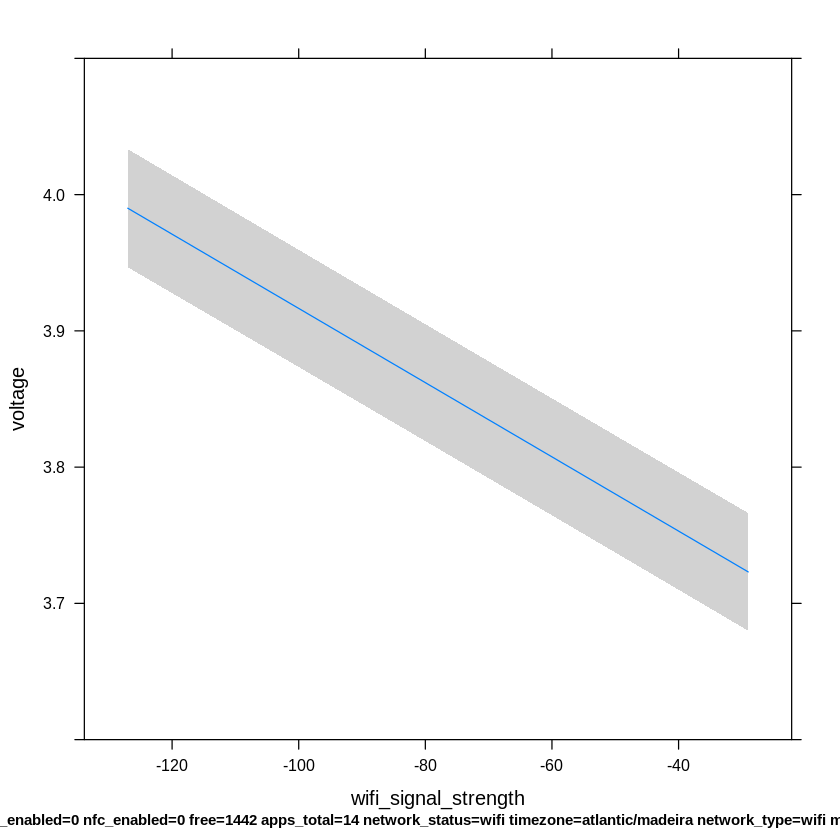

In [0]:
predict <- Predict(fit, wifi_signal_strength)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1505522 0.1507734 0.1513624 0.1516775 0.1504382 0.1508356 0.1514559
 [8] 0.1505230 0.1505696 0.1505204


In [0]:
print(sum(mae) / steps)

[1] 0.1508708


## 1.4) [Samsung Galaxy J2 Prime](https://www.gsmarena.com/samsung_galaxy_j2_prime-8424.php) (codename: sm-g532m)

### 1.4.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g532m.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature', 'wifi_signal_strength',
'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled', 'location_enabled',
'power_saver_enabled', 'unknown_sources', 'developer_mode', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 63242

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on      current_average     temperature   
 Min.   : -1.00    Min.   :0.0000   Min.   :-1441.00   Min.   :13.90  
 1st Qu.:  5.00    1st Qu.:0.0000   1st Qu.: -390.00   1st Qu.:29.80  
 Median : 32.00    Median :1.0000   Median :  -95.00   Median :32.90  
 Mean   : 84.14    Mean   :0.5534   Mean   :   89.03   Mean   :32.41  
 3rd Qu.:155.00    3rd Qu.:1.0000   3rd Qu.:  654.00   3rd Qu.:35.00  
 Max.   :255.00    Max.   :1.0000   Max.   : 1105.00   Max.   :50.60  
 wifi_signal_strength wifi_link_speed   cpu_usage         up_time       
 Min.   :-127.00      Min.   : -1.0   Min.   :0.2300   Min.   :     32  
 1st Qu.:-127.00      1st Qu.: -1.0   1st Qu.:0.5790   1st Qu.:  15869  
 Median :-127.00      Median : -1.0   Median :0.6800   Median :  77062  
 Mean   : -97.69      Mean   : 21.2   Mean   :0.7034   Mean   : 223032  
 3rd Qu.: -71.00      3rd Qu.: 39.0   3rd Qu.:0.8290   3rd Qu.: 246321  
 Max.   : -11.00      Max.   :150.0   Max.   :1.0000   Max.   :22

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status                            timezone      network_type  
 disconnected:18737   america/argentina/buenos_aires: 9605   mobile :13908  
 lte         :13826   america/mexico_city           :53637   unknown:18561  
 wifi        :30679                                          wifi   :30773  
 mobile_network_type    mobile_data_status mobile_data_activity
 0    :20411         connected   :13914    inout: 9378         
 hsupa: 4053         disconnected:49328    none :53864         
 lte  :38778                                                   
   wifi_status     wifi_ap_status 
 disabled:25459   disabled:63242  
 enabled :37783                   
                                  

In [0]:
#Remove constant categorical variables
reject_vars <- c('wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.4.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-4.a)** Correlation analysis will output the hierarchical clusters

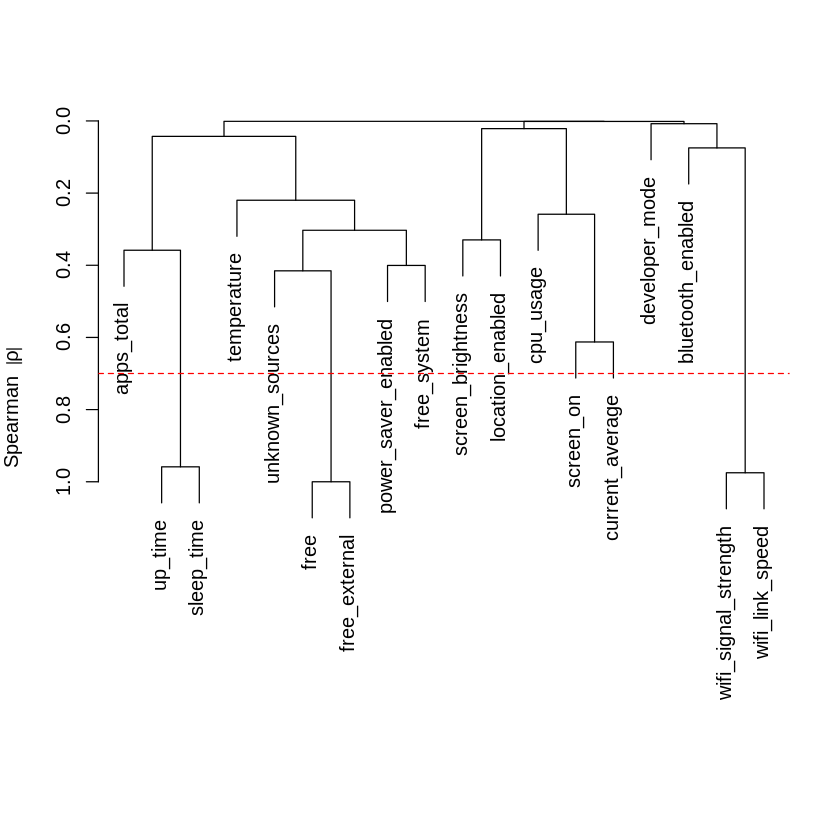

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

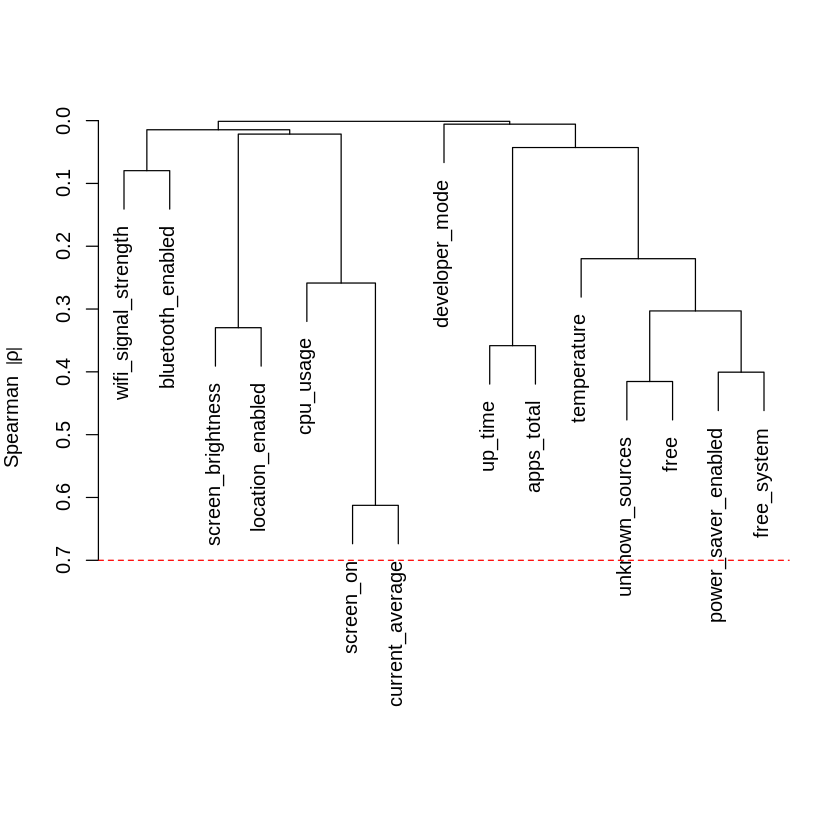

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-3.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 63242 	p: 15 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.207                0.437                0.377 
         temperature wifi_signal_strength            cpu_usage 
               0.214                0.161                0.095 
             up_time    bluetooth_enabled     location_enabled 
               0.166                0.064                0.199 
 power_saver_enabled      unknown_sources       developer_mode 
               0.318                0.343                0.006 
                free          free_system           apps_total 
               0.286                0.400                0.220 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

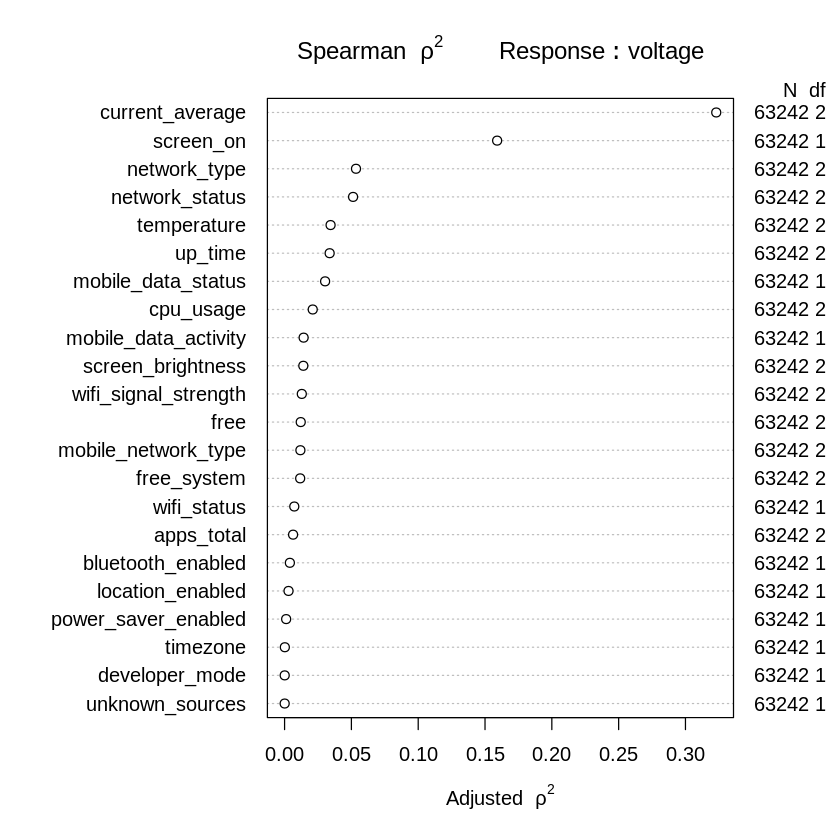

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   63242    LR chi2    32044.58    R2       0.398    
 sigma0.1784    d.f.             25    R2 adj   0.397    
 d.f.  63216    Pr(> chi2)   0.0000    g        0.166    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -1.06421 -0.12926 -0.02582  0.13327  0.52631 
 
 
                                 Coef    S.E.   t      Pr(>|t|)
 Intercept                        4.5313 0.0246 184.45 <0.0001 
 screen_brightness               -0.0001 0.0000  -8.04 <0.0001 
 screen_on                       -0.0342 0.0019 -17.77 <0.0001 
 current_average                  0.0002 0.0000 127.20 <0.0001 
 temperature                     -0.0083 0.0002 -43.73 <0.0001 
 wifi_signal_strength             0.0015 0.0001  19.79 <0.0001 
 cp

In [0]:
validate(fit)


Divergence or singularity in 1 samples


          index.orig training   test optimism index.corrected  n
R-square      0.3975   0.3984 0.3973   0.0012          0.3964 39
MSE           0.0318   0.0318 0.0318   0.0000          0.0318 39
g             0.1660   0.1663 0.1660   0.0003          0.1657 39
Intercept     0.0000   0.0000 0.0055  -0.0055          0.0055 39
Slope         1.0000   1.0000 0.9986   0.0014          0.9986 39

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,5.000,155.000,150.000,-0.010547990,0.0013120073,-1.311953e-02,-0.0079764534,1
screen_on,0.000,1.000,1.000,-0.034163362,0.0019229301,-3.793231e-02,-0.0303944159,1
current_average,-390.000,654.000,1044.000,0.216271270,0.0017003029,2.129387e-01,0.2196038659,1
temperature,29.799,35.000,5.201,-0.043005156,0.0009833389,-4.493250e-02,-0.0410778099,1
wifi_signal_strength,-127.000,-71.000,56.000,0.083082178,0.0041980208,7.485405e-02,0.0913103054,1
cpu_usage,0.579,0.829,0.250,0.004288714,0.0011366618,2.060855e-03,0.0065165725,1
up_time,15869.000,246321.250,230452.250,0.013123978,0.0005177474,1.210919e-02,0.0141387639,1
bluetooth_enabled,0.000,1.000,1.000,0.007519626,0.0023567680,2.900358e-03,0.0121388954,1
location_enabled,0.000,1.000,1.000,-0.012252468,0.0019347003,-1.604448e-02,-0.0084604528,1
power_saver_enabled,0.000,1.000,1.000,-0.037597363,0.0017670599,-4.106080e-02,-0.0341339230,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,2.056467e+00,2.05646737,64.634872,8.881784e-16
screen_on,1,1.004267e+01,10.04266876,315.641581,0.000000e+00
current_average,1,5.147543e+02,514.75433988,16178.754611,0.000000e+00
temperature,1,6.085405e+01,60.85405257,1912.645912,0.000000e+00
wifi_signal_strength,1,1.246182e+01,12.46182084,391.675651,0.000000e+00
cpu_usage,1,4.529461e-01,0.45294607,14.236117,1.612459e-04
up_time,1,2.044326e+01,20.44325852,642.532636,0.000000e+00
bluetooth_enabled,1,3.239021e-01,0.32390212,10.180260,1.419522e-03
location_enabled,1,1.276071e+00,1.27607058,40.106962,2.404306e-10
power_saver_enabled,1,1.440347e+01,14.40347157,452.701831,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(23,24)], decreasing=TRUE)

current_average          temperature          free_system 
        514.75433988          60.85405257          28.35670308 
            timezone              up_time  power_saver_enabled 
         21.91793586          20.44325852          14.40347157 
wifi_signal_strength            screen_on  mobile_network_type 
         12.46182084          10.04266876           5.84815990 
         wifi_status mobile_data_activity    screen_brightness 
          2.47593401           2.43248893           2.05646737 
    location_enabled         network_type            cpu_usage 
          1.27607058           0.62054817           0.45294607 
                free    bluetooth_enabled       network_status 
          0.39444053           0.32390212           0.21920906 
     unknown_sources           apps_total       developer_mode 
          0.17082131           0.11907314           0.06790244 
  mobile_data_status 
          0.03671350

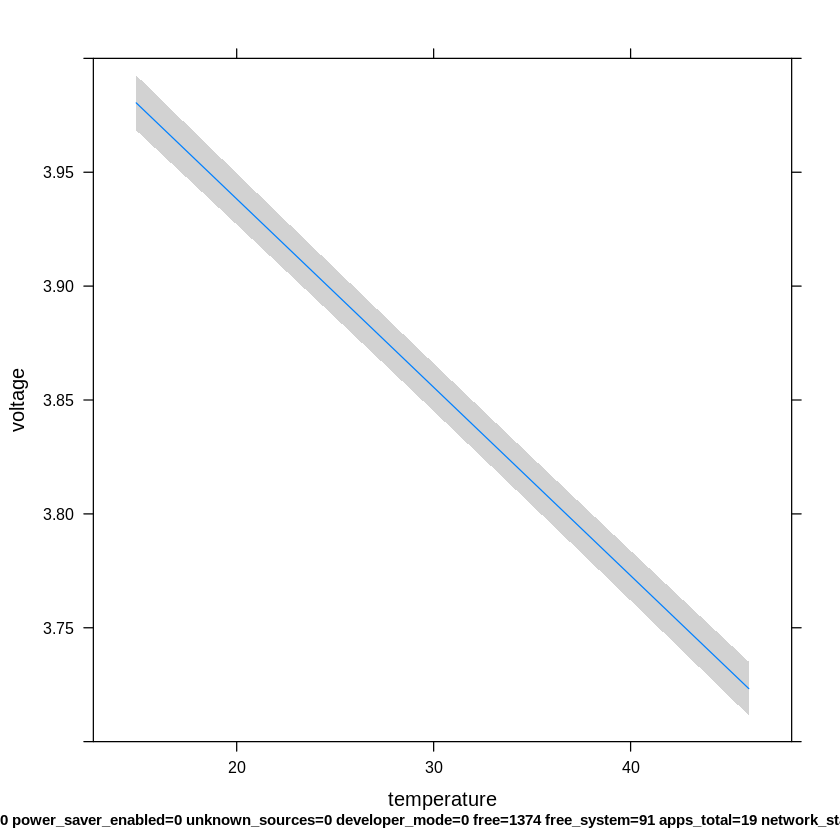

In [0]:
predict <- Predict(fit, temperature)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1464037 0.1464919 0.1464881 0.1468216 0.1467587 0.1459661 0.1468127
 [8] 0.1469923 0.1459727 0.1474309


In [0]:
print(sum(mae) / steps)

[1] 0.1466139


## 1.5) [Samsung Galaxy J5](https://www.gsmarena.com/samsung_galaxy_j5_(2016)-7869.php) (codename: sm-j510fn)

### 1.5.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-j510fn.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'timezone', 'temperature', 'wifi_signal_strength', 'wifi_link_speed',
'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled', 'location_enabled',  'power_saver_enabled',
'nfc_enabled', 'unknown_sources', 'developer_mode', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 66374

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on       temperature     wifi_signal_strength
 Min.   :  5.0     Min.   :0.0000   Min.   : 8.399   Min.   :-127.00     
 1st Qu.: 88.0     1st Qu.:0.0000   1st Qu.:26.000   1st Qu.: -86.00     
 Median :192.0     Median :0.0000   Median :28.700   Median : -72.00     
 Mean   :171.6     Mean   :0.3959   Mean   :28.582   Mean   : -76.24     
 3rd Qu.:255.0     3rd Qu.:1.0000   3rd Qu.:31.500   3rd Qu.: -54.00     
 Max.   :255.0     Max.   :1.0000   Max.   :46.200   Max.   :  -7.00     
 wifi_link_speed   cpu_usage         up_time          sleep_time     
 Min.   :-1.00   Min.   :0.1400   Min.   :     47   Min.   :      0  
 1st Qu.: 1.00   1st Qu.:0.3790   1st Qu.:  42276   1st Qu.:  21088  
 Median :43.00   Median :0.5290   Median : 178931   Median : 100984  
 Mean   :37.34   Mean   :0.5731   Mean   : 501154   Mean   : 327781  
 3rd Qu.:65.00   3rd Qu.:0.7500   3rd Qu.: 526962   3rd Qu.: 342910  
 Max.   :72.00   Max.   :1.0000   Max.   :4058395   Max.   :29

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status           timezone      network_type   mobile_network_type
 disconnected:24850   europe/lisbon:66374   mobile : 6684   lte:66374          
 lte         : 4792                         unknown: 8278                      
 wifi        :36732                         wifi   :51412                      
    mobile_data_status mobile_data_activity   wifi_status     wifi_ap_status 
 connected   :11693    inout:10213          disabled:11702   disabled:66374  
 disconnected:54681    none :56161          enabled :54672                   
                                                                             

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_network_type', 'wifi_ap_status', 'timezone')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.5.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-5.a)** Correlation analysis will output the hierarchical clusters

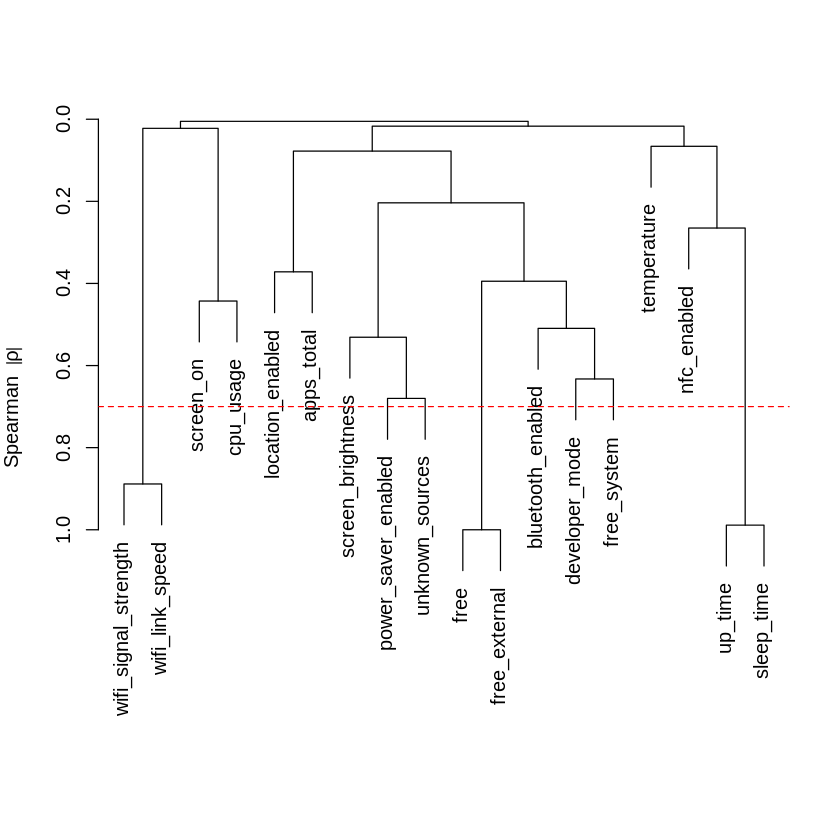

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

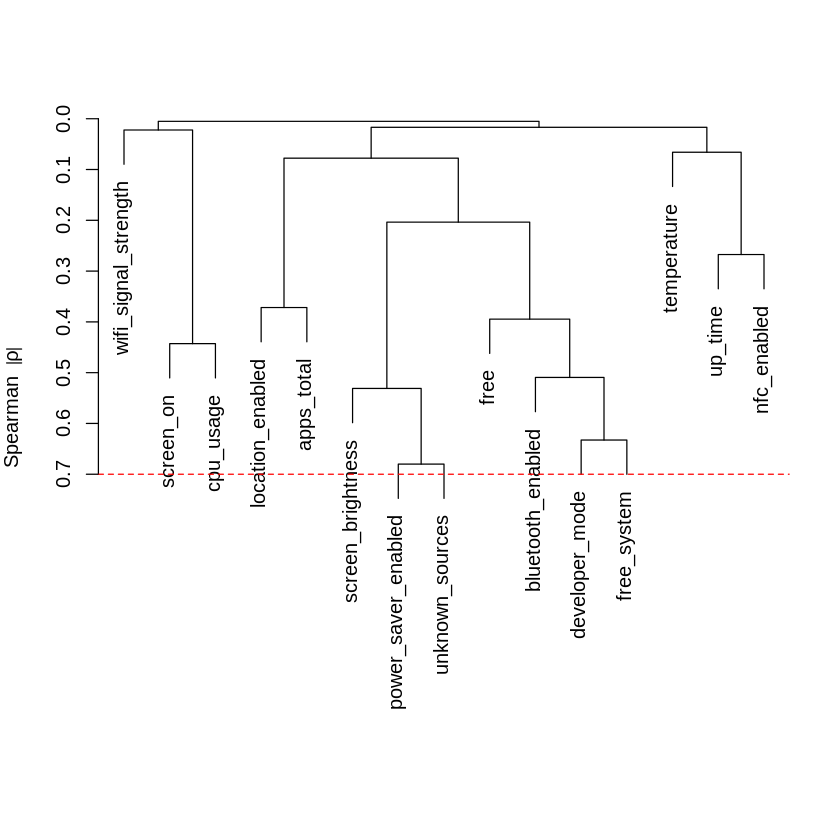

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-5.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 66374 	p: 15 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on          temperature 
               0.576                0.247                0.087 
wifi_signal_strength            cpu_usage              up_time 
               0.098                0.239                0.269 
   bluetooth_enabled     location_enabled  power_saver_enabled 
               0.505                0.567                0.594 
         nfc_enabled      unknown_sources       developer_mode 
               0.456                0.670                0.801 
                free          free_system           apps_total 
               0.463                0.517                0.376 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

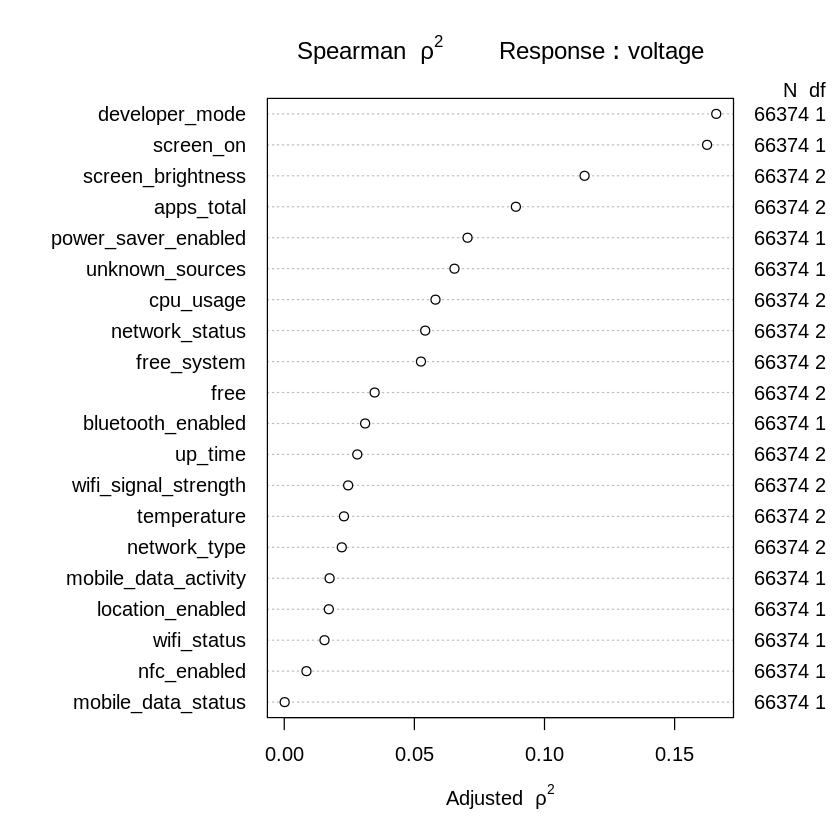

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   66374    LR chi2    30477.01    R2       0.368    
 sigma0.1813    d.f.             22    R2 adj   0.368    
 d.f.  66351    Pr(> chi2)   0.0000    g        0.157    
 
 Residuals
 
        Min         1Q     Median         3Q        Max 
 -2.9255696 -0.1282270  0.0007403  0.1310215  0.6120303 
 
 
                                 Coef    S.E.   t      Pr(>|t|)
 Intercept                        4.4791 0.0144 311.70 <0.0001 
 screen_brightness                0.0001 0.0000   7.94 <0.0001 
 screen_on                       -0.1697 0.0017 -98.60 <0.0001 
 temperature                     -0.0033 0.0002 -17.64 <0.0001 
 wifi_signal_strength             0.0006 0.0000  13.19 <0.0001 
 cpu_usage                       -0.1117 0.0036

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.3682   0.3689 0.3680   0.0009          0.3673 40
MSE           0.0329   0.0328 0.0329  -0.0001          0.0329 40
g             0.1567   0.1568 0.1567   0.0002          0.1565 40
Intercept     0.0000   0.0000 0.0041  -0.0041          0.0041 40
Slope         1.0000   1.0000 0.9990   0.0010          0.9990 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,88.000,255.00,167.000,0.0171324270,0.0021575252,0.012903678,0.0213611758,1
screen_on,0.000,1.00,1.000,-0.1697322173,0.0017214425,-0.173106244,-0.1663581905,1
temperature,26.000,31.50,5.500,-0.0181796902,0.0010306149,-0.020199695,-0.0161596853,1
wifi_signal_strength,-86.000,-54.00,32.000,0.0176661134,0.0013390547,0.015041567,0.0202906603,1
cpu_usage,0.379,0.75,0.371,-0.0414353960,0.0013472758,-0.044076056,-0.0387947358,1
up_time,42276.500,526961.50,484685.000,-0.0036883038,0.0005100948,-0.004688089,-0.0026885182,1
bluetooth_enabled,0.000,1.00,1.000,-0.0116590090,0.0022262247,-0.016022409,-0.0072956091,1
location_enabled,0.000,1.00,1.000,0.0008167021,0.0026755116,-0.004427300,0.0060607041,1
power_saver_enabled,0.000,1.00,1.000,-0.0302479908,0.0026697444,-0.035480689,-0.0250152925,1
nfc_enabled,0.000,1.00,1.000,-0.0253557806,0.0024243811,-0.030107567,-0.0206039943,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,2.073011e+00,2.073011e+00,6.305594e+01,1.998401e-15
screen_on,1,3.196091e+02,3.196091e+02,9.721730e+03,0.000000e+00
temperature,1,1.022953e+01,1.022953e+01,3.111574e+02,0.000000e+00
wifi_signal_strength,1,5.722173e+00,5.722173e+00,1.740546e+02,0.000000e+00
cpu_usage,1,3.109607e+01,3.109607e+01,9.458668e+02,0.000000e+00
up_time,1,1.718807e+00,1.718807e+00,5.228193e+01,4.807266e-13
bluetooth_enabled,1,9.016975e-01,9.016975e-01,2.742744e+01,1.631005e-07
location_enabled,1,3.063298e-03,3.063298e-03,9.317806e-02,7.601751e-01
power_saver_enabled,1,4.220164e+00,4.220164e+00,1.283671e+02,0.000000e+00
nfc_enabled,1,3.596067e+00,3.596067e+00,1.093836e+02,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(21,22)], decreasing=TRUE)

screen_on       developer_mode            cpu_usage 
        3.196091e+02         6.020935e+01         3.109607e+01 
      network_status           apps_total          temperature 
        1.397575e+01         1.154851e+01         1.022953e+01 
wifi_signal_strength          free_system  power_saver_enabled 
        5.722173e+00         4.979445e+00         4.220164e+00 
         nfc_enabled      unknown_sources    screen_brightness 
        3.596067e+00         2.956055e+00         2.073011e+00 
         wifi_status         network_type              up_time 
        1.941227e+00         1.901752e+00         1.718807e+00 
   bluetooth_enabled   mobile_data_status mobile_data_activity 
        9.016975e-01         2.278454e-01         1.420977e-01 
                free     location_enabled 
        1.891515e-02         3.063298e-03

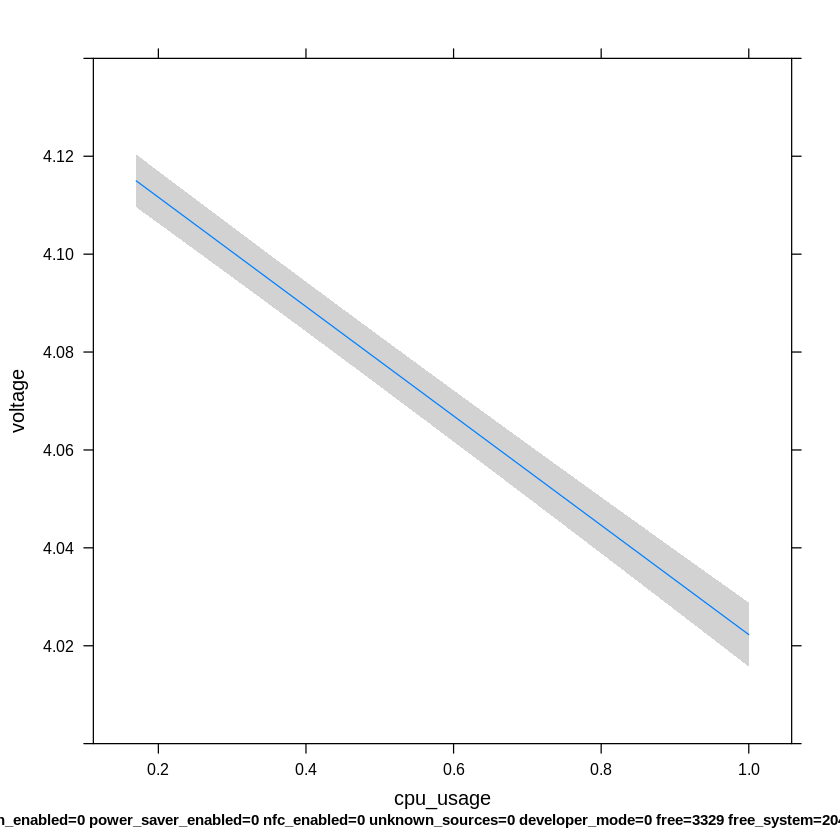

In [0]:
predict <- Predict(fit, cpu_usage)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1473320 0.1480364 0.1464893 0.1464322 0.1470581 0.1477033 0.1483519
 [8] 0.1465755 0.1478939 0.1469778


In [0]:
print(sum(mae) / steps)

[1] 0.147285


## 1.6) [Samsung Galaxy S5](https://www.gsmarena.com/samsung_galaxy_s5-6033.php) (codename: sm-900f)

### 1.6.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g900f.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'timezone', 'temperature', 'wifi_signal_strength', 'wifi_link_speed',
'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled', 'location_enabled',  'power_saver_enabled',
'nfc_enabled', 'unknown_sources', 'developer_mode', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 56964

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on       temperature     wifi_signal_strength
 Min.   : -1.00    Min.   :0.0000   Min.   : 8.199   Min.   :-127.00     
 1st Qu.: -1.00    1st Qu.:0.0000   1st Qu.:27.399   1st Qu.:-127.00     
 Median : -1.00    Median :0.0000   Median :31.299   Median : -68.00     
 Mean   : 26.81    Mean   :0.4033   Mean   :31.024   Mean   : -79.28     
 3rd Qu.: -1.00    3rd Qu.:1.0000   3rd Qu.:35.099   3rd Qu.: -54.00     
 Max.   :255.00    Max.   :1.0000   Max.   :46.299   Max.   : -17.00     
 wifi_link_speed    cpu_usage         up_time           sleep_time     
 Min.   : -1.00   Min.   :0.1190   Min.   :      45   Min.   :      0  
 1st Qu.: -1.00   1st Qu.:0.6000   1st Qu.:   15123   1st Qu.:   6072  
 Median : 52.00   Median :0.6990   Median :  105209   Median :  65720  
 Mean   : 69.17   Mean   :0.7096   Mean   : 1323180   Mean   : 491978  
 3rd Qu.:104.00   3rd Qu.:0.8290   3rd Qu.:  559692   3rd Qu.: 344257  
 Max.   :866.00   Max.   :1.0000   Max.   :1193023

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status             timezone      network_type  
 disconnected:16776   america/chicago:15337   unknown:16403  
 wifi        :40188   europe/lisbon  :41627   wifi   :40561  
                                                             
 mobile_network_type    mobile_data_status mobile_data_activity
 0   :  317          disconnected:56964    inout:10076         
 lte :23168                                none :46888         
 utms:33479                                                    
   wifi_status     wifi_ap_status 
 disabled:14497   disabled:56964  
 enabled :42467                   
                                  

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_data_status', 'wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.6.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-6.a)** Correlation analysis will output the hierarchical clusters

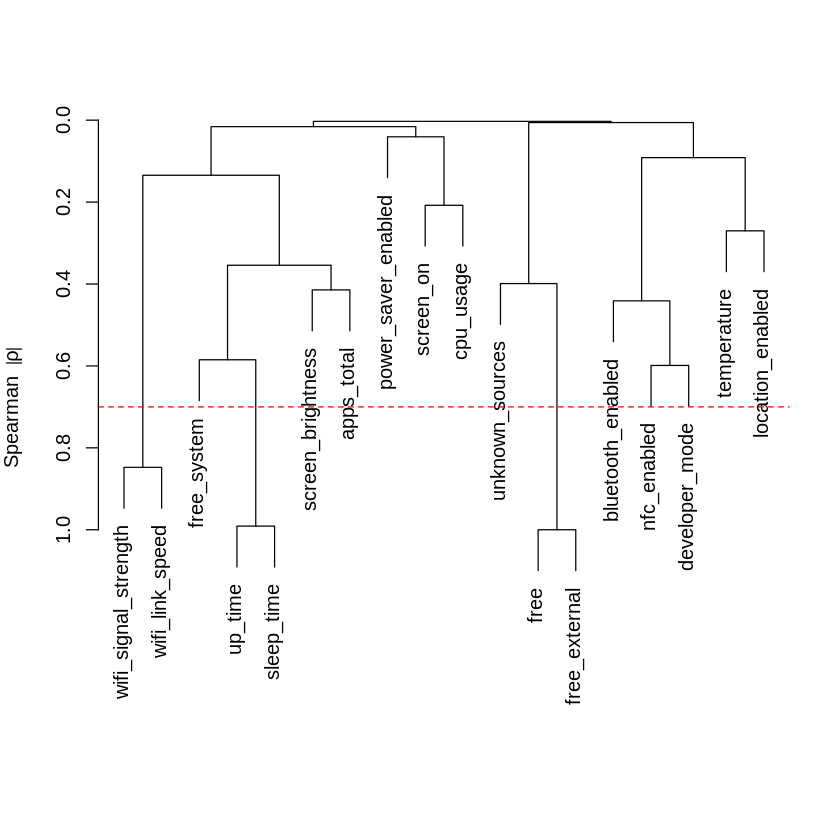

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

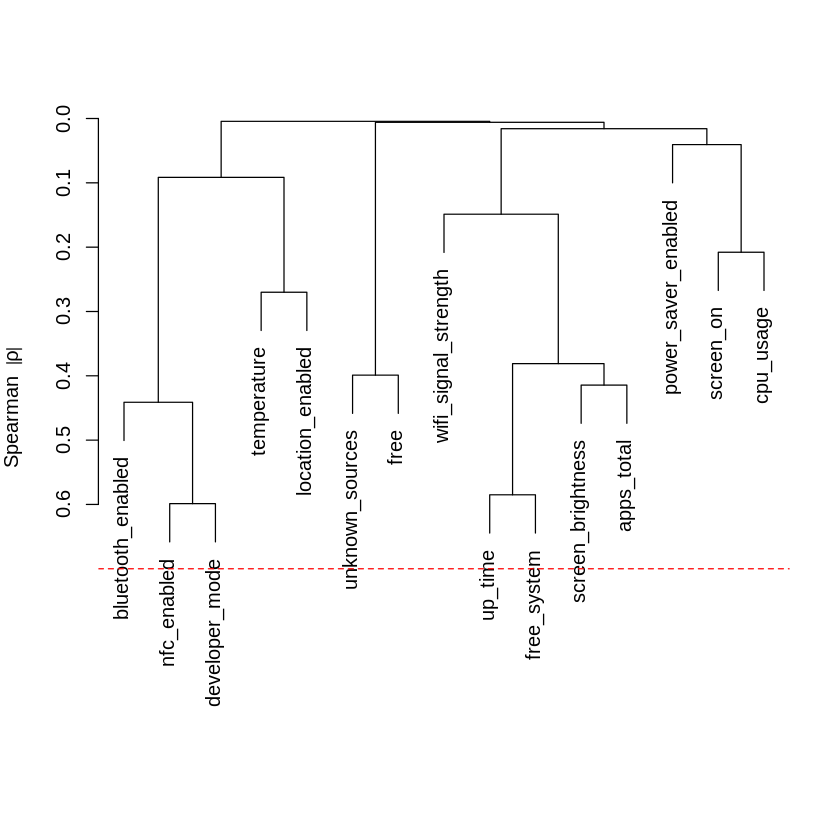

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-6.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 56964 	p: 15 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on          temperature 
               0.342                0.101                0.305 
wifi_signal_strength            cpu_usage              up_time 
               0.358                0.079                0.837 
   bluetooth_enabled     location_enabled  power_saver_enabled 
               0.424                0.507                0.038 
         nfc_enabled      unknown_sources       developer_mode 
               0.763                0.724                0.825 
                free          free_system           apps_total 
               0.705                0.752                0.289 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

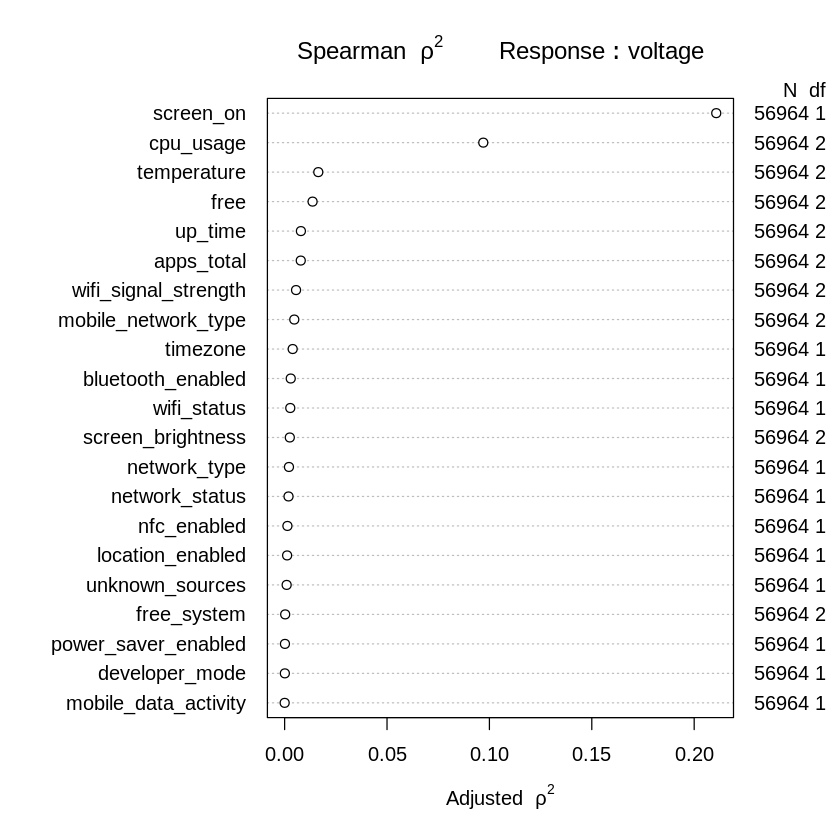

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   56964    LR chi2    20149.98    R2       0.298    
 sigma0.2119    d.f.             22    R2 adj   0.298    
 d.f.  56941    Pr(> chi2)   0.0000    g        0.158    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -1.09548 -0.13469  0.01046  0.15010  0.67783 
 
 
                           Coef    S.E.   t       Pr(>|t|)
 Intercept                  4.3908 0.0204  215.41 <0.0001 
 screen_brightness         -0.0001 0.0000   -4.57 <0.0001 
 screen_on                 -0.2216 0.0019 -115.88 <0.0001 
 temperature                0.0007 0.0002    3.58 0.0003  
 wifi_signal_strength       0.0006 0.0001    7.02 <0.0001 
 cpu_usage                 -0.3488 0.0059  -59.20 <0.0001 
 up_time                    0.0000 0.0

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.2979   0.2976 0.2976   0.0000          0.2979 40
MSE           0.0449   0.0449 0.0449   0.0000          0.0448 40
g             0.1579   0.1578 0.1578   0.0000          0.1579 40
Intercept     0.0000   0.0000 0.0039  -0.0039          0.0039 40
Slope         1.0000   1.0000 0.9990   0.0010          0.9990 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.000,255.000,256.000,-0.0202301406,0.0044297087,-0.028912395,-0.0115478865,1
screen_on,0.000,1.000,1.000,-0.2215616615,0.0019120251,-0.225309241,-0.2178140815,1
temperature,27.399,35.099,7.700,0.0056180542,0.0015687708,0.002543255,0.0086928538,1
wifi_signal_strength,-127.000,-54.000,73.000,0.0456700224,0.0065055382,0.032919131,0.0584209141,1
cpu_usage,0.600,0.829,0.229,-0.0798742084,0.0013492994,-0.082518843,-0.0772295740,1
up_time,15123.250,559691.750,544568.500,0.0097263763,0.0004250075,0.008893359,0.0105593934,1
bluetooth_enabled,0.000,1.000,1.000,0.0106040516,0.0031883916,0.004354786,0.0168533170,1
location_enabled,0.000,1.000,1.000,-0.0168632824,0.0026551700,-0.022067431,-0.0116591341,1
power_saver_enabled,0.000,1.000,1.000,0.1080875461,0.0213013704,0.066336740,0.1498383525,1
nfc_enabled,0.000,1.000,1.000,0.0956689829,0.0052357665,0.085406851,0.1059311149,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,9.360936e-01,9.360936e-01,2.085679e+01,4.949346e-06
screen_on,1,6.026621e+02,6.026621e+02,1.342771e+04,0.000000e+00
temperature,1,5.756051e-01,5.756051e-01,1.282487e+01,3.420429e-04
wifi_signal_strength,1,2.211912e+00,2.211912e+00,4.928287e+01,2.215894e-12
cpu_usage,1,1.572781e+02,1.572781e+02,3.504261e+03,0.000000e+00
up_time,1,2.350611e+01,2.350611e+01,5.237319e+02,0.000000e+00
bluetooth_enabled,1,4.964462e-01,4.964462e-01,1.106115e+01,8.815535e-04
location_enabled,1,1.810387e+00,1.810387e+00,4.033662e+01,2.137639e-10
power_saver_enabled,1,1.155601e+00,1.155601e+00,2.574757e+01,3.891169e-07
nfc_enabled,1,1.498489e+01,1.498489e+01,3.338734e+02,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(22,23)], decreasing=TRUE)

screen_on            cpu_usage             timezone 
        6.026621e+02         1.572781e+02         4.915299e+01 
      developer_mode              up_time           apps_total 
        3.493200e+01         2.350611e+01         1.510084e+01 
         nfc_enabled          free_system  mobile_network_type 
        1.498489e+01         1.330184e+01         4.819110e+00 
         wifi_status       network_status wifi_signal_strength 
        3.661795e+00         2.552694e+00         2.211912e+00 
    location_enabled         network_type  power_saver_enabled 
        1.810387e+00         1.545272e+00         1.155601e+00 
   screen_brightness          temperature    bluetooth_enabled 
        9.360936e-01         5.756051e-01         4.964462e-01 
mobile_data_activity      unknown_sources                 free 
        1.143861e-01         3.237913e-02         2.332162e-03

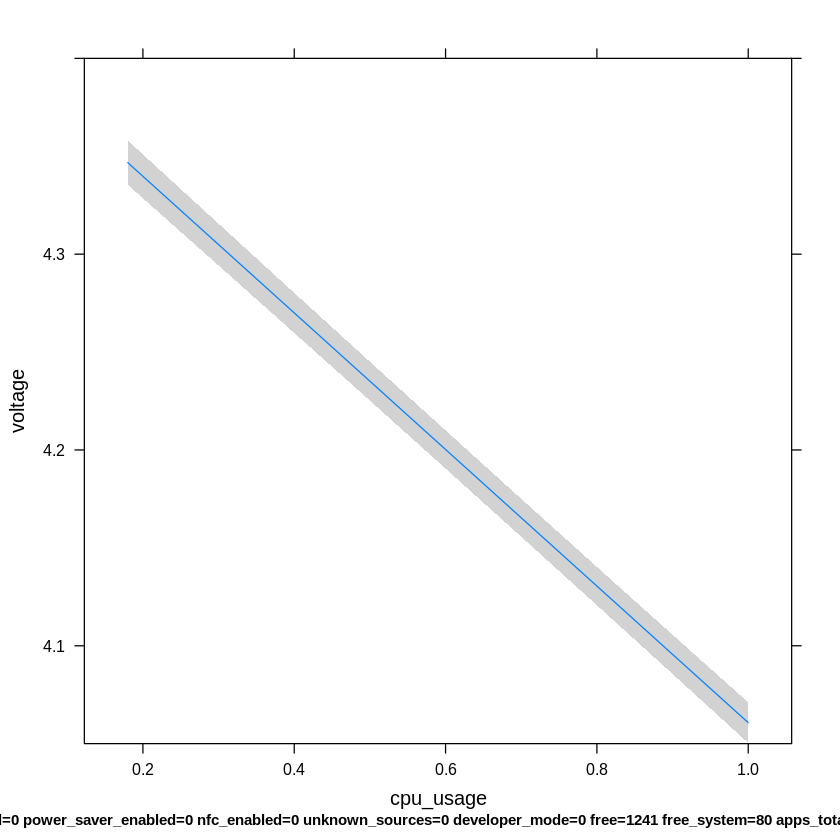

In [0]:
predict <- Predict(fit, cpu_usage)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1696332 0.1702831 0.1673580 0.1683947 0.1685598 0.1686859 0.1693511
 [8] 0.1692839 0.1675595 0.1678393


In [0]:
print(sum(mae) / steps)

[1] 0.1686949


## 1.7) [Samsung Galaxy S6](https://www.gsmarena.com/samsung_galaxy_s6-6849.php) (codename: sm-920f)

### 1.7.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g920f.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature',
'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled',
'location_enabled', 'power_saver_enabled', 'nfc_enabled', 'unknown_sources', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 92940

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on     current_average    temperature    
 Min.   : -1       Min.   :0.000   Min.   :-2058.0   Min.   : 9.699  
 1st Qu.: -1       1st Qu.:0.000   1st Qu.: -389.0   1st Qu.:26.100  
 Median :128       Median :0.000   Median :  365.0   Median :28.600  
 Mean   :109       Mean   :0.489   Mean   :  345.6   Mean   :28.714  
 3rd Qu.:223       3rd Qu.:1.000   3rd Qu.:  887.0   3rd Qu.:31.299  
 Max.   :255       Max.   :1.000   Max.   : 2042.0   Max.   :45.700  
 wifi_signal_strength wifi_link_speed   cpu_usage           up_time        
 Min.   :-127.00      Min.   : -1.0   Min.   :-114.000   Min.   :      38  
 1st Qu.: -79.00      1st Qu.: 26.0   1st Qu.:   0.200   1st Qu.:   61998  
 Median : -66.00      Median : 58.0   Median :   0.330   Median :  179794  
 Mean   : -68.39      Mean   :122.6   Mean   :   0.342   Mean   :  572795  
 3rd Qu.: -50.00      3rd Qu.:144.0   3rd Qu.:   0.490   3rd Qu.:  477446  
 Max.   :  -7.00      Max.   :866.0   Max.   :  98.000

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status           timezone      network_type   mobile_network_type
 disconnected:27950   europe/lisbon:51485   unknown: 8891   hsupa:40852        
 wifi        :64990   europe/london:41455   wifi   :84049   lte  :42614        
                                                            utms : 9474        
    mobile_data_status mobile_data_activity   wifi_status     wifi_ap_status 
 disconnected:92940    inout:24507          disabled: 7164   disabled:92940  
                       none :68433          enabled :85776                   
                                                                             

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_data_status', 'wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.7.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-7.a)** Correlation analysis will output the hierarchical clusters

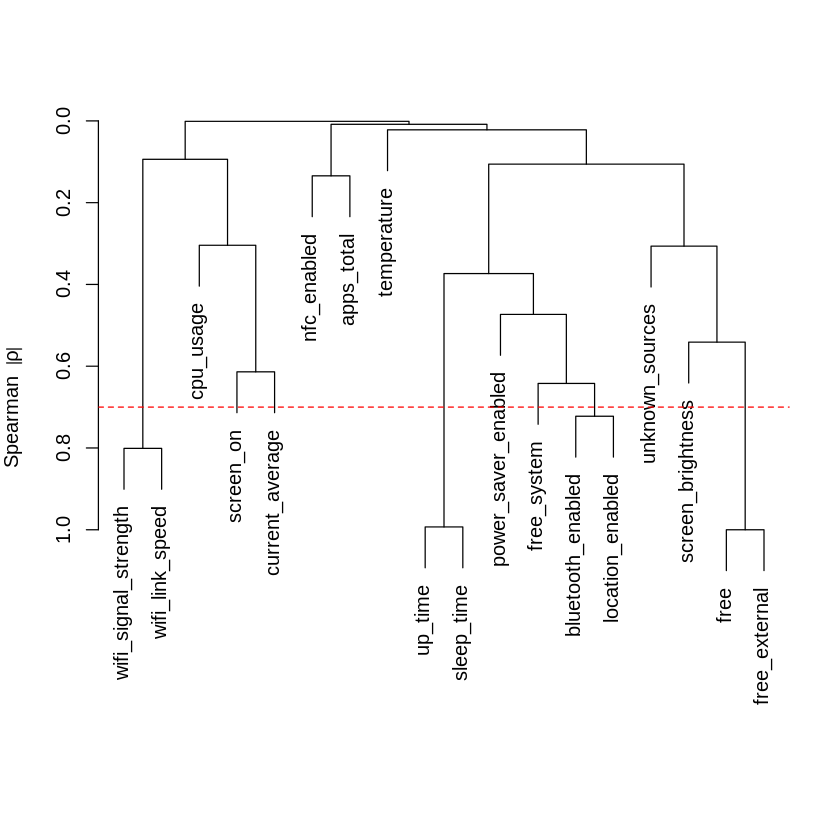

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time','wifi_link_speed', 'bluetooth_enabled')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

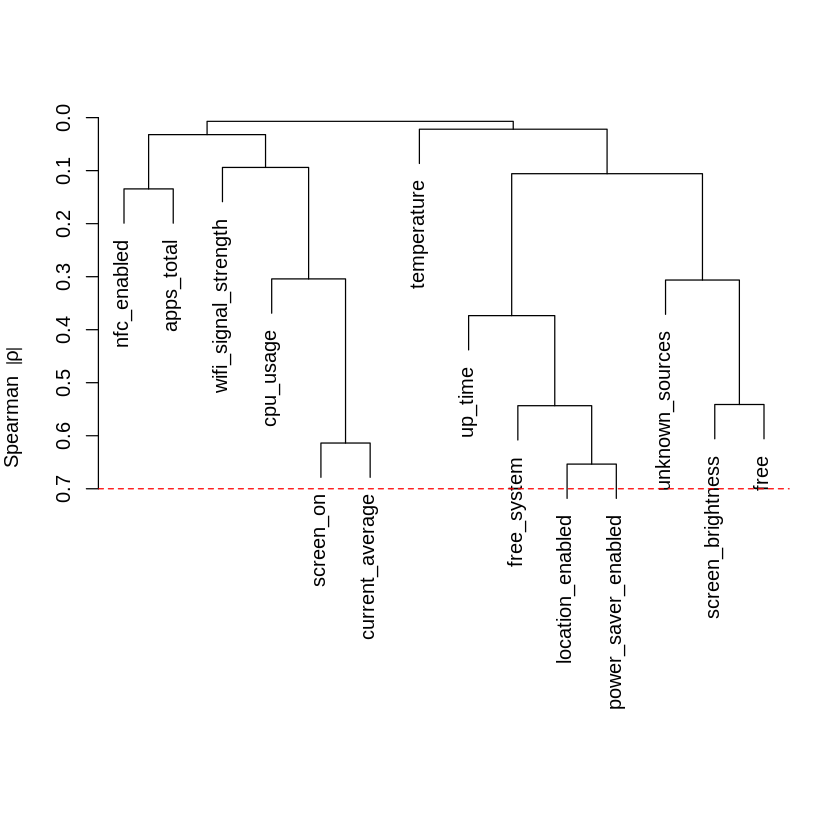

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-7.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 92940 	p: 14 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.552                0.444                0.536 
         temperature wifi_signal_strength            cpu_usage 
               0.108                0.096                0.015 
             up_time     location_enabled  power_saver_enabled 
               0.450                0.715                0.517 
         nfc_enabled      unknown_sources                 free 
               0.456                0.451                0.710 
         free_system           apps_total 
               0.588                0.525 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

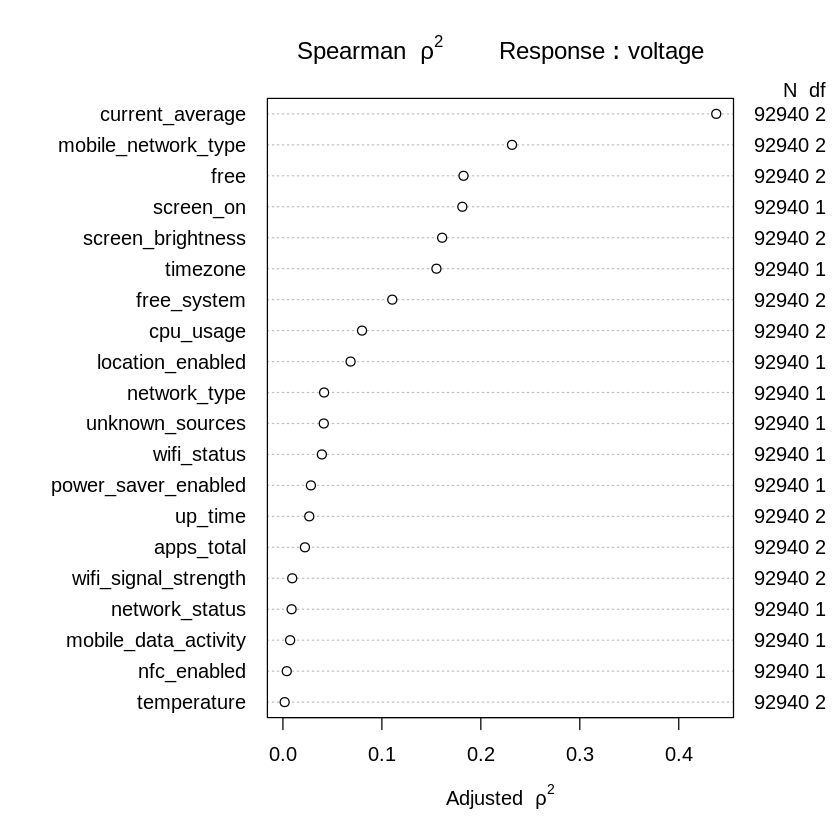

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   92940    LR chi2    61842.19    R2       0.486    
 sigma0.1630    d.f.             21    R2 adj   0.486    
 d.f.  92918    Pr(> chi2)   0.0000    g        0.182    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -1.01148 -0.11262 -0.02986  0.10606  0.95647 
 
 
                           Coef    S.E.   t      Pr(>|t|)
 Intercept                  4.2323 0.0149 283.83 <0.0001 
 screen_brightness         -0.0003 0.0000 -29.27 <0.0001 
 screen_on                 -0.0503 0.0015 -34.64 <0.0001 
 current_average            0.0001 0.0000 136.72 <0.0001 
 temperature               -0.0057 0.0001 -38.58 <0.0001 
 wifi_signal_strength       0.0001 0.0000   3.01 0.0026  
 cpu_usage                 -0.0094 0.0008 -12

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.4859   0.4869 0.4851   0.0018          0.4841 40
MSE           0.0266   0.0265 0.0266  -0.0001          0.0267 40
g             0.1817   0.1818 0.1814   0.0004          0.1813 40
Intercept     0.0000   0.0000 0.0079  -0.0079          0.0079 40
Slope         1.0000   1.0000 0.9980   0.0020          0.9980 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.0,223.000,224.000,-0.0573071809,0.0019576573,-0.061144169,-0.0534701931,1
screen_on,0.0,1.000,1.000,-0.0502669458,0.0014509725,-0.053110837,-0.0474230549,1
current_average,-389.0,887.000,1276.000,0.1750083359,0.0012800278,0.172499495,0.1775171769,1
temperature,26.1,31.299,5.199,-0.0294567154,0.0007636181,-0.030953399,-0.0279600320,1
wifi_signal_strength,-79.0,-50.000,29.000,0.0034090944,0.0011332177,0.001188000,0.0056301891,1
cpu_usage,0.2,0.490,0.290,-0.0027164451,0.0002198943,-0.003147436,-0.0022854546,1
up_time,61998.0,477445.500,415447.500,-0.0013396485,0.0002017634,-0.001735103,-0.0009441942,1
location_enabled,0.0,1.000,1.000,0.0142328503,0.0022589859,0.009805262,0.0186604389,1
power_saver_enabled,0.0,1.000,1.000,0.0125483416,0.0018892347,0.008845461,0.0162512219,1
nfc_enabled,0.0,1.000,1.000,0.0570066196,0.0025153040,0.052076650,0.0619365892,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,2.275997e+01,2.275997e+01,8.569288e+02,0.000000e+00
screen_on,1,3.187672e+01,3.187672e+01,1.200181e+03,0.000000e+00
current_average,1,4.964844e+02,4.964844e+02,1.869299e+04,0.000000e+00
temperature,1,3.952239e+01,3.952239e+01,1.488046e+03,0.000000e+00
wifi_signal_strength,1,2.403689e-01,2.403689e-01,9.050059e+00,2.626864e-03
cpu_usage,1,4.053227e+00,4.053227e+00,1.526068e+02,0.000000e+00
up_time,1,1.170910e+00,1.170910e+00,4.408560e+01,3.143252e-11
location_enabled,1,1.054347e+00,1.054347e+00,3.969691e+01,2.965939e-10
power_saver_enabled,1,1.171731e+00,1.171731e+00,4.411648e+01,3.094058e-11
nfc_enabled,1,1.364258e+01,1.364258e+01,5.136527e+02,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(22,23)], decreasing=TRUE)

TOTAL      current_average          temperature 
        2.332820e+03         4.964844e+02         3.952239e+01 
           screen_on    screen_brightness           apps_total 
        3.187672e+01         2.275997e+01         1.671719e+01 
         nfc_enabled                 free            cpu_usage 
        1.364258e+01         6.156018e+00         4.053227e+00 
     unknown_sources       network_status  power_saver_enabled 
        2.477099e+00         2.333740e+00         1.171731e+00 
             up_time     location_enabled          wifi_status 
        1.170910e+00         1.054347e+00         7.006978e-01 
        network_type             timezone          free_system 
        6.068054e-01         5.326653e-01         2.588579e-01 
wifi_signal_strength  mobile_network_type mobile_data_activity 
        2.403689e-01         1.753337e-01         2.097088e-03

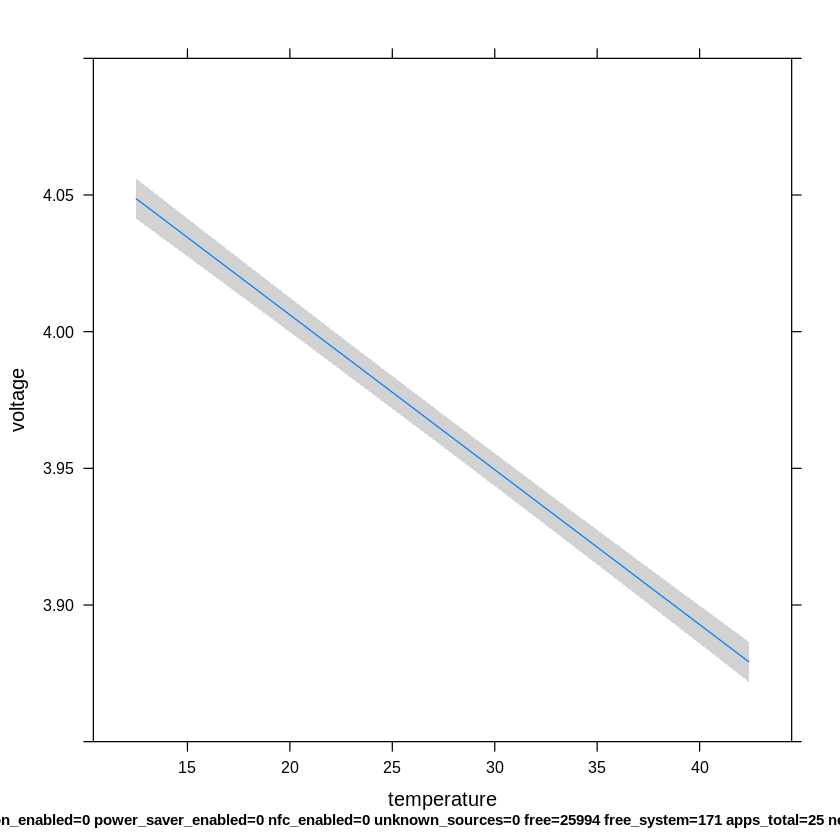

In [0]:
predict <- Predict(fit, temperature)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1317669 0.1308248 0.1314209 0.1313776 0.1308296 0.1314824 0.1311435
 [8] 0.1302231 0.1310851 0.1318475


In [0]:
print(sum(mae) / steps)

[1] 0.1312001


## 1.8) [Samsung Galaxy S6 edge](https://www.gsmarena.com/samsung_galaxy_s6_edge-7079.php) (codename: sm-925f)

### 1.8.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g925f.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature',
'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled',
'location_enabled', 'power_saver_enabled', 'nfc_enabled', 'unknown_sources', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 66675

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on      current_average    temperature  
 Min.   : -1.00    Min.   :0.0000   Min.   :-2034.0   Min.   : 7.8  
 1st Qu.: -1.00    1st Qu.:0.0000   1st Qu.: -123.0   1st Qu.:22.6  
 Median : -1.00    Median :0.0000   Median :  708.0   Median :25.7  
 Mean   : 23.24    Mean   :0.3801   Mean   :  689.9   Mean   :25.6  
 3rd Qu.: -1.00    3rd Qu.:1.0000   3rd Qu.: 1575.0   3rd Qu.:28.6  
 Max.   :255.00    Max.   :1.0000   Max.   : 2071.0   Max.   :46.2  
 wifi_signal_strength wifi_link_speed   cpu_usage           up_time       
 Min.   :-127.00      Min.   : -1.0   Min.   :-76.0000   Min.   :     43  
 1st Qu.:-127.00      1st Qu.: -1.0   1st Qu.:  0.1500   1st Qu.:  73351  
 Median : -71.00      Median : 39.0   Median :  0.3190   Median : 188247  
 Mean   : -85.66      Mean   :103.7   Mean   :  0.3234   Mean   : 290794  
 3rd Qu.: -56.00      3rd Qu.:104.0   3rd Qu.:  0.4790   3rd Qu.: 407971  
 Max.   : -15.00      Max.   :866.0   Max.   :154.0000   Max.   :27

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status              timezone      network_type  
 disconnected:19921   atlantic/madeira: 7112   mobile :17800  
 lte         : 9494   europe/lisbon   :59563   unknown: 8129  
 wifi        :37260                            wifi   :40746  
 mobile_network_type    mobile_data_status mobile_data_activity
 lte:66675           connected   :17840    inout:16260         
                     disconnected:48835    none :50415         
                                                               
   wifi_status     wifi_ap_status 
 disabled:19840   disabled:66675  
 enabled :46835                   
                                  

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_network_type', 'wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.8.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-8.a)** Correlation analysis will output the hierarchical clusters

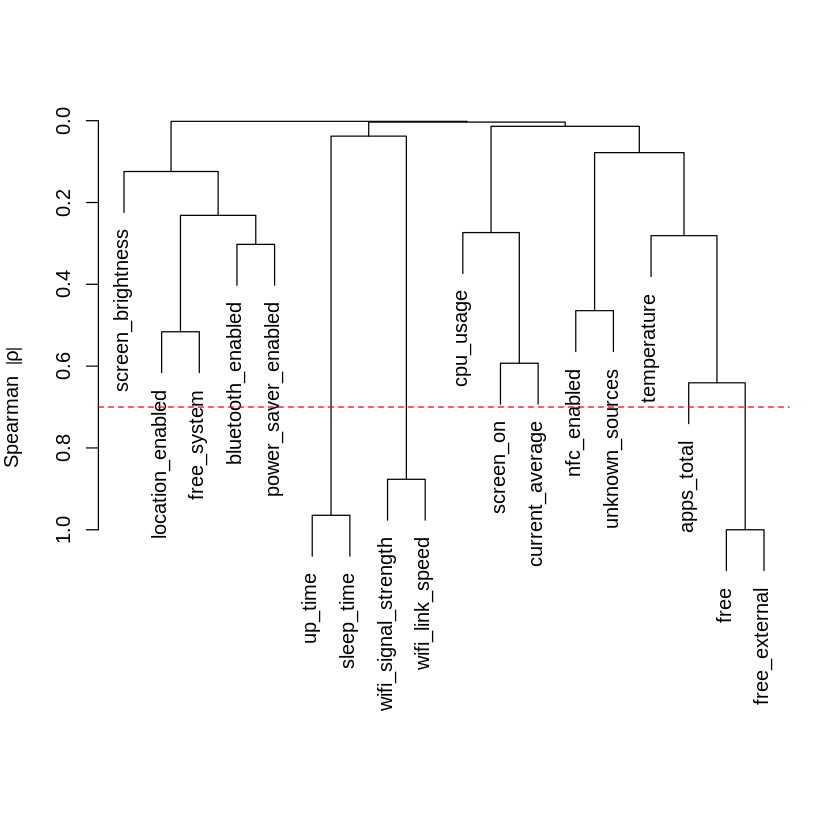

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time','wifi_link_speed', 'bluetooth_enabled')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

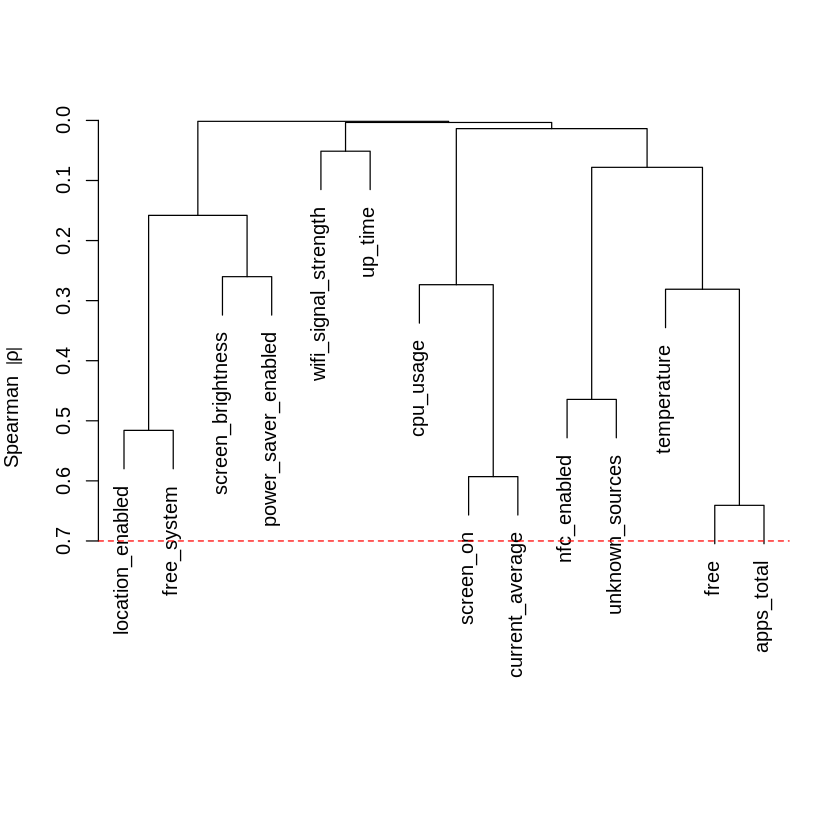

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-8.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 66675 	p: 14 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.120                0.418                0.458 
         temperature wifi_signal_strength            cpu_usage 
               0.277                0.034                0.011 
             up_time     location_enabled  power_saver_enabled 
               0.049                0.425                0.196 
         nfc_enabled      unknown_sources                 free 
               0.312                0.429                0.633 
         free_system           apps_total 
               0.480                0.524 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

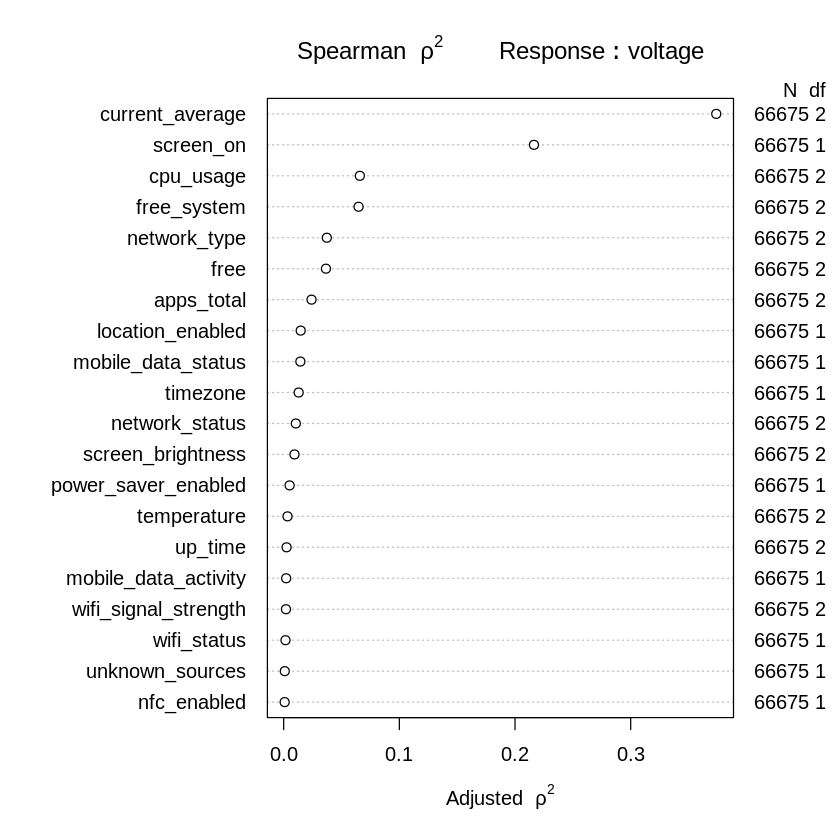

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs   66675    LR chi2    43137.63    R2       0.476    
 sigma0.1674    d.f.             22    R2 adj   0.476    
 d.f.  66652    Pr(> chi2)   0.0000    g        0.183    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -0.75923 -0.11701 -0.01272  0.12614  0.82926 
 
 
                                 Coef    S.E.   t      Pr(>|t|)
 Intercept                        4.4681 0.0122 365.80 <0.0001 
 screen_brightness               -0.0001 0.0000  -8.63 <0.0001 
 screen_on                       -0.0664 0.0018 -37.56 <0.0001 
 current_average                  0.0001 0.0000 131.87 <0.0001 
 temperature                     -0.0061 0.0002 -35.76 <0.0001 
 wifi_signal_strength             0.0004 0.0001   6.08 <0.0001 
 cp

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.4764   0.4767 0.4760   0.0007          0.4757 40
MSE           0.0280   0.0280 0.0280   0.0000          0.0280 40
g             0.1828   0.1829 0.1826   0.0002          0.1825 40
Intercept     0.0000   0.0000 0.0043  -0.0043          0.0043 40
Slope         1.0000   1.0000 0.9989   0.0011          0.9989 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.00,255.000,256.000,-0.0266824243,0.0030909379,-0.0327406613,-0.020624187,1
screen_on,0.00,1.000,1.000,-0.0663958094,0.0017678879,-0.0698608688,-0.062930750,1
current_average,-123.00,1575.000,1698.000,0.2167401825,0.0016436375,0.2135186537,0.219961711,1
temperature,22.60,28.600,6.000,-0.0368133602,0.0010294306,-0.0388310437,-0.034795677,1
wifi_signal_strength,-127.00,-56.000,71.000,0.0290119834,0.0047732855,0.0196563458,0.038367621,1
cpu_usage,0.15,0.479,0.329,-0.0019973841,0.0002432437,-0.0024741417,-0.001520627,1
up_time,73351.00,407971.000,334620.000,0.0006883332,0.0007040323,-0.0006915697,0.002068236,1
location_enabled,0.00,1.000,1.000,-0.0080247660,0.0017858423,-0.0115250163,-0.004524516,1
power_saver_enabled,0.00,1.000,1.000,0.0152247726,0.0019410187,0.0114203768,0.019029168,1
nfc_enabled,0.00,1.000,1.000,-0.0105825058,0.0030986789,-0.0166559152,-0.004509096,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,2.087655e+00,2.08765480,7.451951e+01,0.000000e+00
screen_on,1,3.951487e+01,39.51487294,1.410496e+03,0.000000e+00
current_average,1,4.871419e+02,487.14190424,1.738869e+04,0.000000e+00
temperature,1,3.582659e+01,35.82658920,1.278842e+03,0.000000e+00
wifi_signal_strength,1,1.034925e+00,1.03492457,3.694197e+01,1.216980e-09
cpu_usage,1,1.888985e+00,1.88898536,6.742794e+01,2.220446e-16
up_time,1,2.677941e-02,0.02677941,9.558998e-01,3.282221e-01
location_enabled,1,5.656753e-01,0.56567528,2.019196e+01,7.004665e-06
power_saver_enabled,1,1.723578e+00,1.72357771,6.152366e+01,4.329870e-15
nfc_enabled,1,3.267477e-01,0.32674771,1.166337e+01,6.374294e-04


In [0]:
sort(explantory_power[,"Partial SS"][-c(21,22)], decreasing=TRUE)

current_average          free_system            screen_on 
        487.14190424          53.30801703          39.51487294 
            timezone          temperature                 free 
         37.58087836          35.82658920          18.35837197 
     unknown_sources           apps_total       network_status 
         12.67501446          12.03249785           6.33569667 
mobile_data_activity         network_type    screen_brightness 
          4.15199969           3.02120712           2.08765480 
           cpu_usage  power_saver_enabled wifi_signal_strength 
          1.88898536           1.72357771           1.03492457 
    location_enabled          nfc_enabled          wifi_status 
          0.56567528           0.32674771           0.30211529 
  mobile_data_status              up_time 
          0.08502408           0.02677941

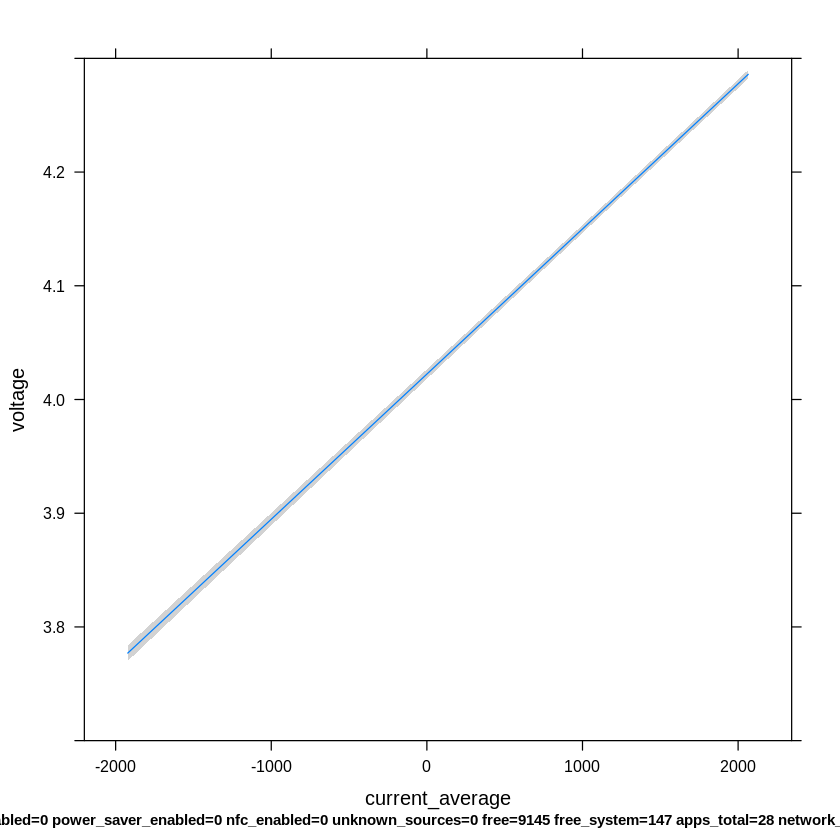

In [0]:
predict <- Predict(fit, current_average)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1369492 0.1371146 0.1359849 0.1368522 0.1361552 0.1367525 0.1365049
 [8] 0.1364015 0.1367054 0.1370629


In [0]:
print(sum(mae) / steps)

[1] 0.1366483


## 1.9) [Samsung Galaxy S7](https://www.gsmarena.com/samsung_galaxy_s7-7821.php) (codename: sm-930f)

### 1.9.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g930f.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature',
'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled',
'location_enabled', 'power_saver_enabled', 'nfc_enabled', 'unknown_sources', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 107185

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on      current_average    temperature    
 Min.   : -1.0     Min.   :0.0000   Min.   :-2032.0   Min.   : 8.699  
 1st Qu.: -1.0     1st Qu.:0.0000   1st Qu.: -165.0   1st Qu.:24.100  
 Median : 88.0     Median :0.0000   Median :  685.0   Median :28.100  
 Mean   : 71.1     Mean   :0.3575   Mean   :  777.6   Mean   :28.127  
 3rd Qu.:117.0     3rd Qu.:1.0000   3rd Qu.: 1736.0   3rd Qu.:32.000  
 Max.   :255.0     Max.   :1.0000   Max.   : 2462.0   Max.   :44.900  
 wifi_signal_strength wifi_link_speed    cpu_usage          up_time       
 Min.   :-127.00      Min.   : -1.00   Min.   :-1.8300   Min.   :     25  
 1st Qu.: -93.00      1st Qu.:  5.00   1st Qu.: 0.2890   1st Qu.: 148512  
 Median : -71.00      Median : 65.00   Median : 0.4090   Median : 413628  
 Mean   : -80.31      Mean   : 78.92   Mean   : 0.4215   Mean   : 674357  
 3rd Qu.: -60.00      3rd Qu.:130.00   3rd Qu.: 0.5500   3rd Qu.: 908006  
 Max.   : -20.00      Max.   :866.00   Max.   :19.500

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status           timezone       network_type  
 disconnected:45372   europe/lisbon:107185   unknown:25189  
 wifi        :61813                          wifi   :81996  
 mobile_network_type    mobile_data_status mobile_data_activity
 lte :94526          disconnected:107185   inout:30040         
 utms:12659                                none :77145         
   wifi_status     wifi_ap_status  
 disabled:23544   disabled:107185  
 enabled :83641                    

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_data_status', 'wifi_ap_status', 'timezone')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.9.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-9.a)** Correlation analysis will output the hierarchical clusters

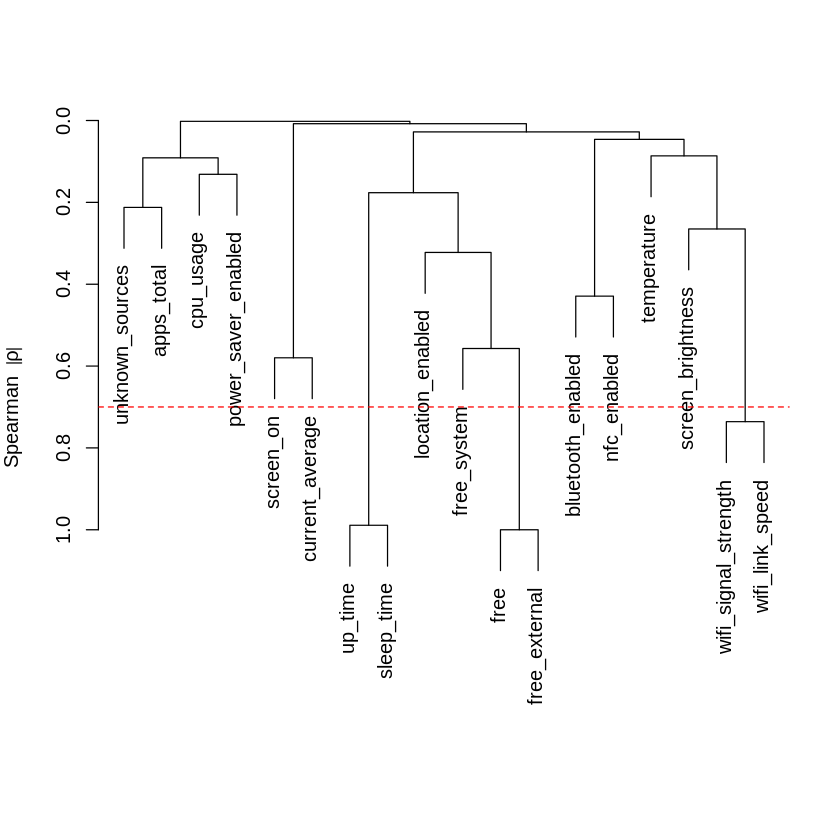

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time','wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

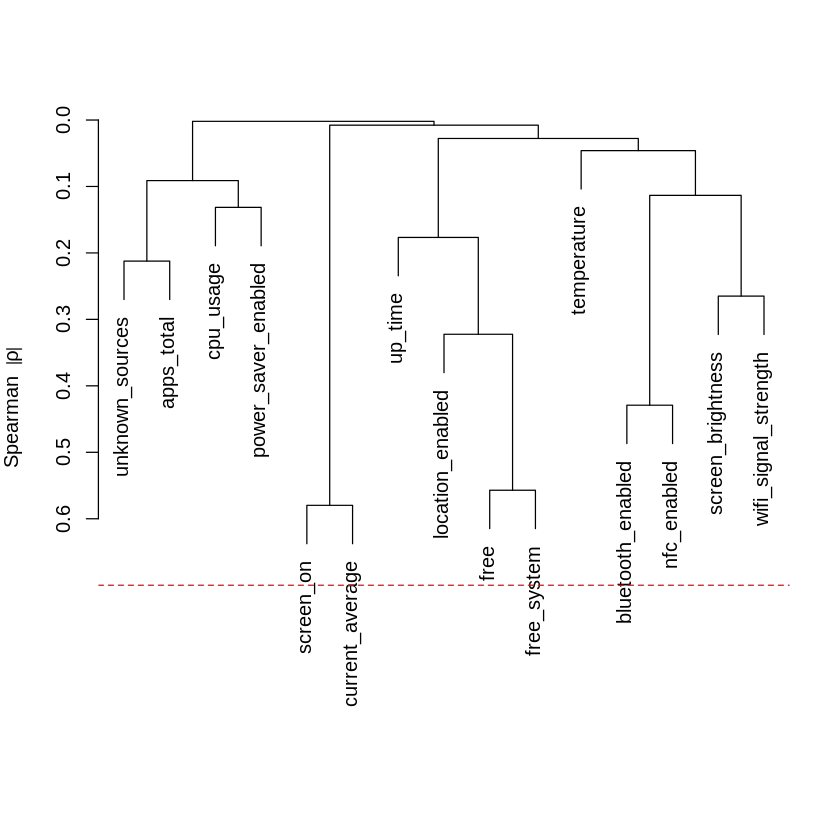

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-9.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 107185 	p: 15 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.297                0.516                0.520 
         temperature wifi_signal_strength            cpu_usage 
               0.286                0.243                0.080 
             up_time    bluetooth_enabled     location_enabled 
               0.123                0.310                0.377 
 power_saver_enabled          nfc_enabled      unknown_sources 
               0.190                0.324                0.215 
                free          free_system           apps_total 
               0.446                0.343                0.414 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

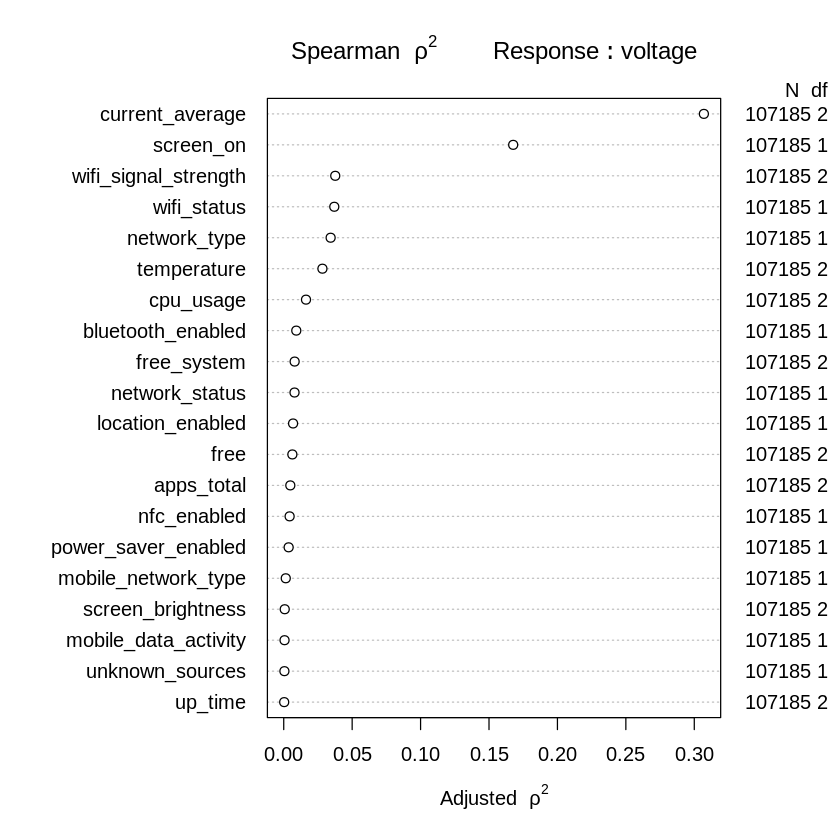

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs  107185    LR chi2    47001.38    R2       0.355    
 sigma0.1512    d.f.             20    R2 adj   0.355    
 d.f. 107164    Pr(> chi2)   0.0000    g        0.128    
 
 Residuals
 
     Min      1Q  Median      3Q     Max 
 -0.7726 -0.1137 -0.0201  0.1189  0.5909 
 
 
                           Coef    S.E.   t      Pr(>|t|)
 Intercept                  4.0740 0.0080 510.23 <0.0001 
 screen_brightness          0.0000 0.0000  -0.15 0.8773  
 screen_on                 -0.0505 0.0014 -36.37 <0.0001 
 current_average            0.0001 0.0000 144.38 <0.0001 
 temperature               -0.0040 0.0001 -38.40 <0.0001 
 wifi_signal_strength      -0.0011 0.0000 -25.11 <0.0001 
 cpu_usage                 -0.0232 0.0024  -9.74 <0.000

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.3550   0.3553 0.3548    5e-04          0.3545 40
MSE           0.0229   0.0229 0.0229    0e+00          0.0229 40
g             0.1285   0.1285 0.1285    1e-04          0.1284 40
Intercept     0.0000   0.0000 0.0009   -9e-04          0.0009 40
Slope         1.0000   1.0000 0.9998    2e-04          0.9998 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.000,117.00,118.000,-0.0001555741,0.0010079308,-0.0021311045,0.0018199562,1
screen_on,0.000,1.00,1.000,-0.0505478997,0.0013899700,-0.0532722217,-0.0478235778,1
current_average,-165.000,1736.00,1901.000,0.1739829701,0.0012050184,0.1716211509,0.1763447894,1
temperature,24.100,32.00,7.900,-0.0312731515,0.0008143446,-0.0328692556,-0.0296770475,1
wifi_signal_strength,-93.000,-60.00,33.000,-0.0360169114,0.0014341146,-0.0388277562,-0.0332060666,1
cpu_usage,0.289,0.55,0.261,-0.0060454309,0.0006208270,-0.0072622432,-0.0048286187,1
up_time,148512.000,908006.00,759494.000,-0.0038904718,0.0004636397,-0.0047991992,-0.0029817443,1
bluetooth_enabled,0.000,1.00,1.000,-0.0032845311,0.0015827587,-0.0063867163,-0.0001823459,1
location_enabled,0.000,1.00,1.000,0.0208779895,0.0013186693,0.0182934159,0.0234625630,1
power_saver_enabled,0.000,1.00,1.000,0.0452474945,0.0013111313,0.0426776954,0.0478172936,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,5.449104e-04,5.449104e-04,2.382393e-02,8.773338e-01
screen_on,1,3.024873e+01,3.024873e+01,1.322499e+03,0.000000e+00
current_average,1,4.768019e+02,4.768019e+02,2.084616e+04,0.000000e+00
temperature,1,3.373174e+01,3.373174e+01,1.474779e+03,0.000000e+00
wifi_signal_strength,1,1.442637e+01,1.442637e+01,6.307325e+02,0.000000e+00
cpu_usage,1,2.168828e+00,2.168828e+00,9.482293e+01,0.000000e+00
up_time,1,1.610479e+00,1.610479e+00,7.041144e+01,0.000000e+00
bluetooth_enabled,1,9.849839e-02,9.849839e-02,4.306429e+00,3.796858e-02
location_enabled,1,5.733467e+00,5.733467e+00,2.506718e+02,0.000000e+00
power_saver_enabled,1,2.724009e+01,2.724009e+01,1.190959e+03,0.000000e+00


In [0]:
sort(explantory_power[,"Partial SS"][-c(21,22)], decreasing=TRUE)

current_average          temperature            screen_on 
        4.768019e+02         3.373174e+01         3.024873e+01 
 power_saver_enabled           apps_total wifi_signal_strength 
        2.724009e+01         1.747971e+01         1.442637e+01 
                free     location_enabled         network_type 
        8.779735e+00         5.733467e+00         4.050034e+00 
           cpu_usage       network_status              up_time 
        2.168828e+00         2.055913e+00         1.610479e+00 
         nfc_enabled      unknown_sources          wifi_status 
        1.507571e+00         5.538116e-01         4.436125e-01 
mobile_data_activity  mobile_network_type          free_system 
        3.668285e-01         2.598313e-01         1.857770e-01 
   bluetooth_enabled    screen_brightness 
        9.849839e-02         5.449104e-04

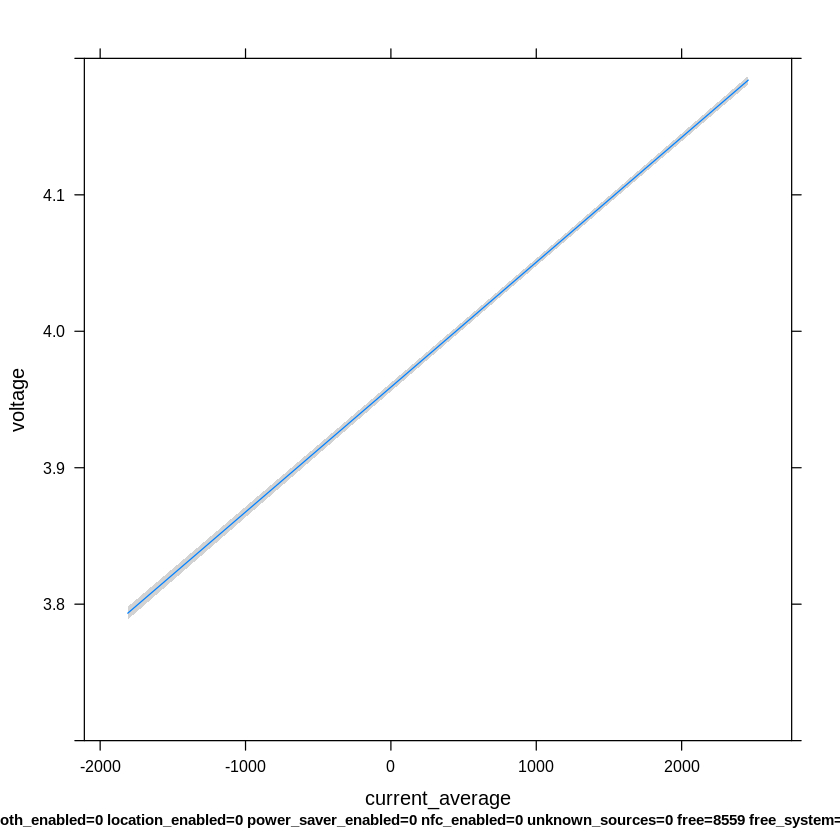

In [0]:
predict <- Predict(fit, current_average)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1262979 0.1263603 0.1266112 0.1265691 0.1263583 0.1263009 0.1257306
 [8] 0.1263212 0.1264015 0.1259405


In [0]:
print(sum(mae) / steps)

[1] 0.1262892


## 1.10) [Samsung Galaxy S7 edge](https://www.gsmarena.com/samsung_galaxy_s7_edge-7945.php) (codename: sm-935f)

### 1.10.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that the variables used may vary according to the model studied.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-sm-g935f.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature',
'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled',
'location_enabled', 'power_saver_enabled', 'nfc_enabled', 'unknown_sources', 'free', 'free_external', 'free_system',
'network_status', 'network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity',
'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type",
"mobile_data_status", "mobile_data_activity", "wifi_status", "wifi_ap_status")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 113884

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on     current_average    temperature    
 Min.   : -1.0     Min.   :0.000   Min.   :-2082.0   Min.   : 9.899  
 1st Qu.: -1.0     1st Qu.:0.000   1st Qu.: -314.0   1st Qu.:24.899  
 Median : 51.0     Median :0.000   Median :  689.0   Median :28.200  
 Mean   :104.5     Mean   :0.405   Mean   :  798.8   Mean   :28.245  
 3rd Qu.:255.0     3rd Qu.:1.000   3rd Qu.: 1900.0   3rd Qu.:31.799  
 Max.   :255.0     Max.   :1.000   Max.   : 2670.0   Max.   :50.700  
 wifi_signal_strength wifi_link_speed    cpu_usage          up_time       
 Min.   :-127.0       Min.   : -1.00   Min.   :-12.670   Min.   :     22  
 1st Qu.: -76.0       1st Qu.: 39.00   1st Qu.:  0.289   1st Qu.: 123838  
 Median : -65.0       Median : 86.00   Median :  0.409   Median : 446495  
 Mean   : -72.3       Mean   : 98.62   Mean   :  0.415   Mean   : 806972  
 3rd Qu.: -54.0       3rd Qu.:130.00   3rd Qu.:  0.550   3rd Qu.:1143982  
 Max.   : -15.0       Max.   :866.00   Max.   :  8.909   Max

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status           timezone      network_type   mobile_network_type
 disconnected:25389   europe/lisbon:113884   mobile:22067   lte:113884         
 lte         :15109                          wifi  :91817                      
 wifi        :73386                                                            
    mobile_data_status mobile_data_activity   wifi_status      wifi_ap_status  
 connected   :22090    inout:22677          disabled: 12095   disabled:113884  
 disconnected:91794    none :91207          enabled :101789                    
                                                                               

In [0]:
#Remove constant categorical variables
reject_vars <- c('mobile_network_type', 'wifi_ap_status', 'timezone')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 1.10.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-10.a)** Correlation analysis will output the hierarchical clusters

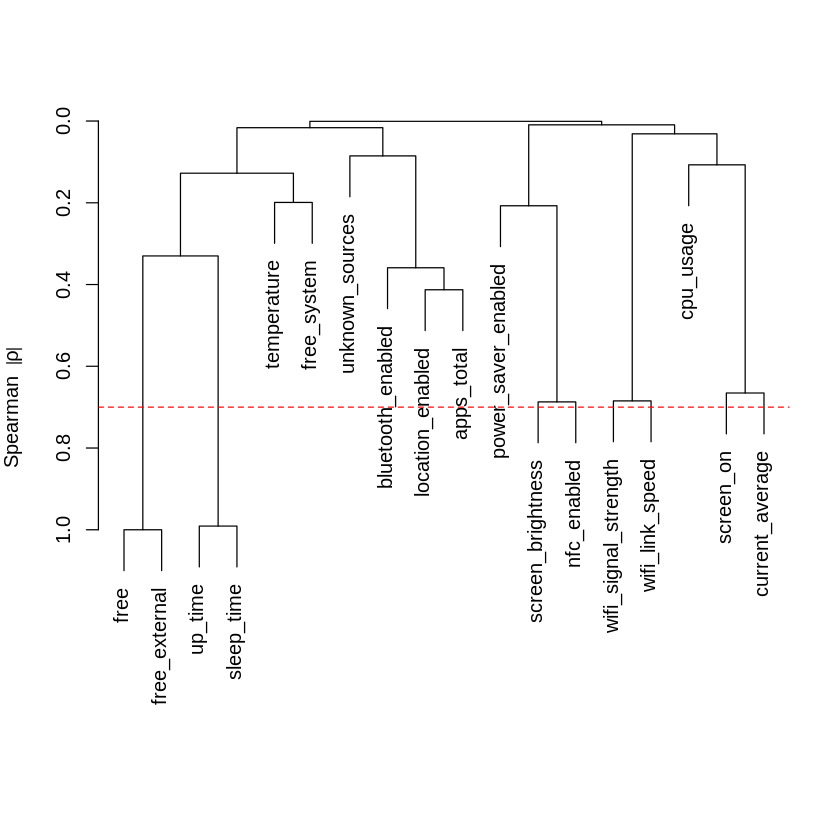

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time', 'wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

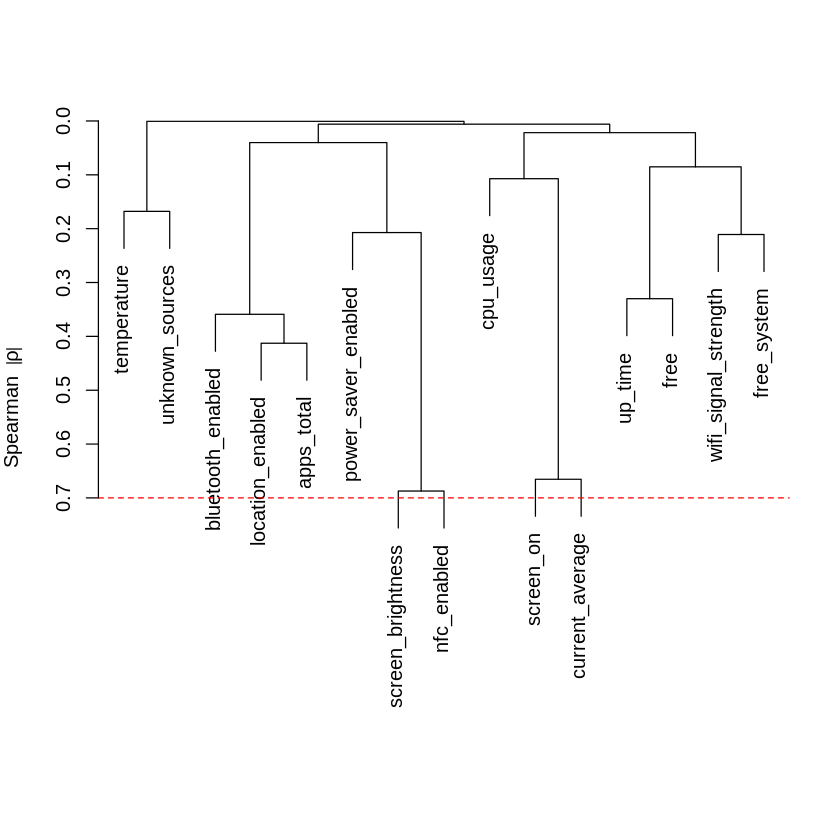

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-10.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 113884 	p: 15 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.525                0.530                0.522 
         temperature wifi_signal_strength            cpu_usage 
               0.247                0.112                0.059 
             up_time    bluetooth_enabled     location_enabled 
               0.185                0.321                0.432 
 power_saver_enabled          nfc_enabled      unknown_sources 
               0.161                0.605                0.223 
                free          free_system           apps_total 
               0.257                0.168                0.475 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical and categorical variables for model building
ind_vars <- c(ind_vars,cat_vars)

In [0]:
#RMS package requires a data distribution when building a model
dd <- datadist(data[, c("voltage", ind_vars)])
options(datadist = "dd")

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

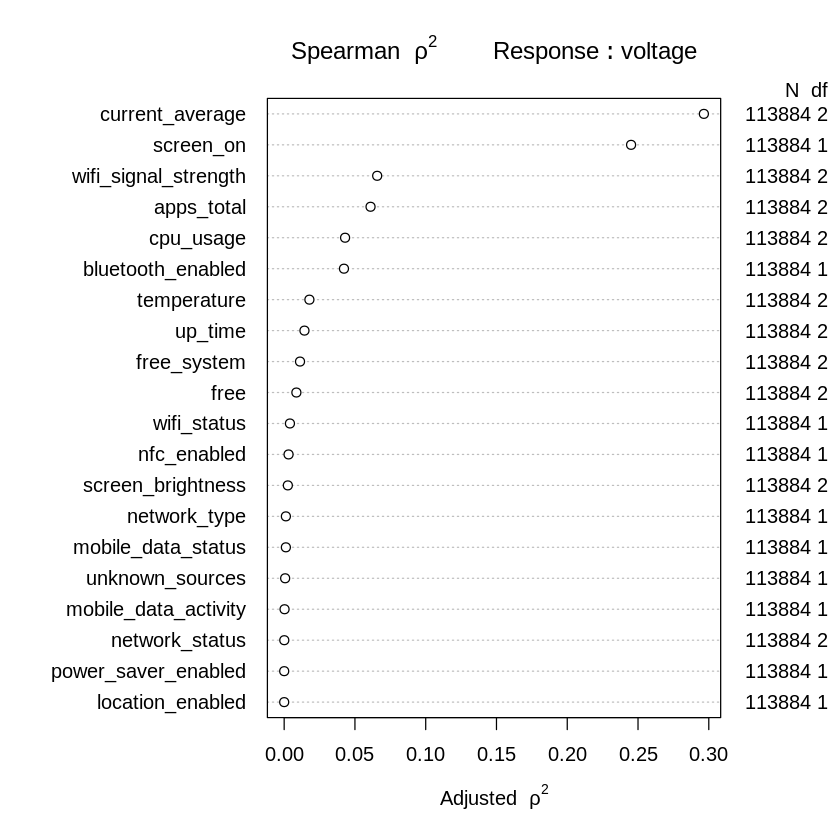

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

In [0]:
fit <- ols(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, x=T, y=T)
print(fit)

Linear Regression Model
 
 ols(formula = formula(paste("voltage", " ~ ", paste0(ind_vars, 
     collapse = " + "))), data = data, x = T, y = T)
 
                 Model Likelihood      Discrimination    
                    Ratio Test            Indexes        
 Obs  113884    LR chi2    54497.65    R2       0.380    
 sigma0.1511    d.f.             21    R2 adj   0.380    
 d.f. 113862    Pr(> chi2)   0.0000    g        0.136    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -0.70536 -0.11328 -0.01925  0.12048  0.49872 
 
 
                                 Coef    S.E.   t      Pr(>|t|)
 Intercept                        4.1651 0.0076 544.99 <0.0001 
 screen_brightness               -0.0001 0.0000 -16.34 <0.0001 
 screen_on                       -0.0623 0.0013 -46.44 <0.0001 
 current_average                  0.0001 0.0000 123.06 <0.0001 
 temperature                     -0.0043 0.0001 -39.43 <0.0001 
 wifi_signal_strength            -0.0001 0.0000  -3.17 0.0015  
 cp

In [0]:
validate(fit)

          index.orig training   test optimism index.corrected  n
R-square      0.3803   0.3807 0.3802   0.0005          0.3798 40
MSE           0.0228   0.0228 0.0228   0.0000          0.0228 40
g             0.1362   0.1363 0.1362   0.0001          0.1361 40
Intercept     0.0000   0.0000 0.0023  -0.0023          0.0023 40
Slope         1.0000   1.0000 0.9994   0.0006          0.9994 40

In [0]:
summary(fit)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
screen_brightness,-1.000,255.000,256.000,-0.024193207,0.0014807482,-0.027095451,-2.129096e-02,1
screen_on,0.000,1.000,1.000,-0.062290929,0.0013413176,-0.064919891,-5.966197e-02,1
current_average,-314.000,1900.000,2214.000,0.151818024,0.0012336841,0.149400022,1.542360e-01,1
temperature,24.899,31.799,6.900,-0.029549330,0.0007494790,-0.031018297,-2.808036e-02,1
wifi_signal_strength,-76.000,-54.000,22.000,-0.002780721,0.0008768737,-0.004499380,-1.062062e-03,1
cpu_usage,0.289,0.550,0.261,-0.004512355,0.0006078551,-0.005703741,-3.320968e-03,1
up_time,123838.000,1143982.500,1020144.500,-0.006414051,0.0005108705,-0.007415349,-5.412752e-03,1
bluetooth_enabled,0.000,1.000,1.000,-0.014243613,0.0011377414,-0.016473569,-1.201366e-02,1
location_enabled,0.000,1.000,1.000,0.047089507,0.0013949318,0.044355462,4.982355e-02,1
power_saver_enabled,0.000,1.000,1.000,0.006983003,0.0017215806,0.003608731,1.035728e-02,1


In [0]:
explantory_power = anova(fit, test='Chisq')
explantory_power

,d.f.,Partial SS,MS,Chi-Square,P
screen_brightness,1,6.091594e+00,6.09159369,266.946615,0.000000e+00
screen_on,1,4.921448e+01,49.21447518,2156.683169,0.000000e+00
current_average,1,3.455774e+02,345.57735221,15143.935930,0.000000e+00
temperature,1,3.547177e+01,35.47176832,1554.448471,0.000000e+00
wifi_signal_strength,1,2.294813e-01,0.22948125,10.056358,1.518231e-03
cpu_usage,1,1.257514e+00,1.25751377,55.106933,1.141309e-13
up_time,1,3.597076e+00,3.59707591,157.631531,0.000000e+00
bluetooth_enabled,1,3.576513e+00,3.57651258,156.730402,0.000000e+00
location_enabled,1,2.600452e+01,26.00452023,1139.573487,0.000000e+00
power_saver_enabled,1,3.754363e-01,0.37543632,16.452420,4.988647e-05


In [0]:
sort(explantory_power[,"Partial SS"][-c(21,22)], decreasing=TRUE)

current_average           apps_total            screen_on 
        345.57735221          54.16237520          49.21447518 
         temperature     location_enabled      unknown_sources 
         35.47176832          26.00452023          19.47019703 
         nfc_enabled          wifi_status    screen_brightness 
         12.31008901          10.49550931           6.09159369 
mobile_data_activity              up_time    bluetooth_enabled 
          3.65845301           3.59707591           3.57651258 
                free       network_status            cpu_usage 
          3.39485397           2.25900504           1.25751377 
 power_saver_enabled wifi_signal_strength   mobile_data_status 
          0.37543632           0.22948125           0.22883489 
        network_type          free_system 
          0.19940152           0.08969092

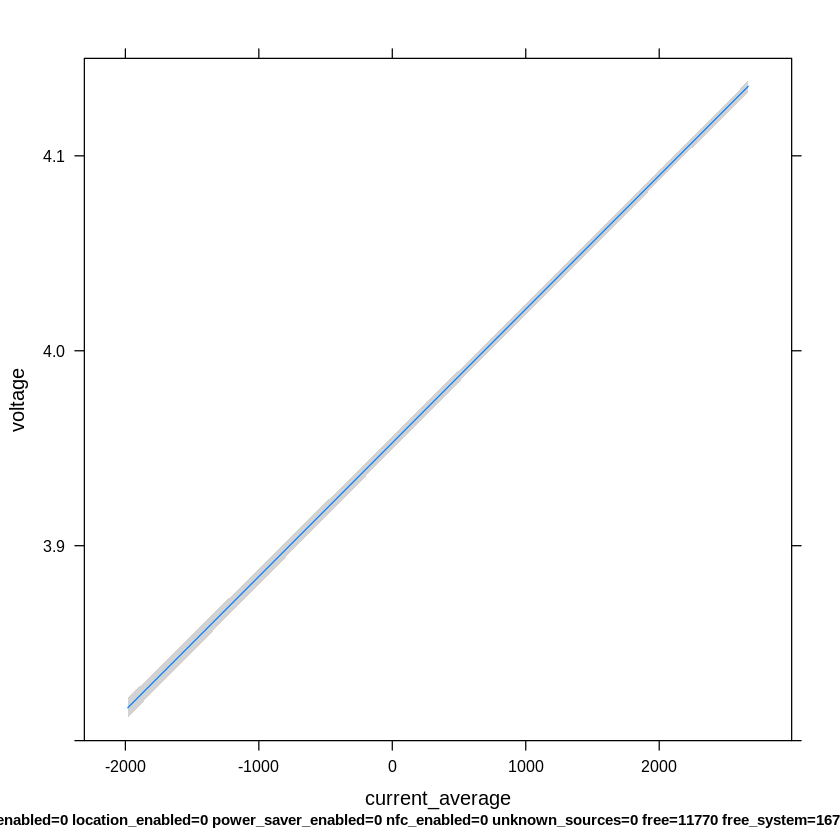

In [0]:
predict <- Predict(fit, current_average)
plot(predict)

In [0]:
mae <- NULL
steps <- 10

for(i in seq(1, steps)){
  indices <- sample(nrow(data), replace=TRUE)
  train <- data[indices,]
  test <- data[-unique(indices),]
  dd <- datadist(train[,c("voltage",ind_vars)])
  options(datadist = "dd")
  fit <- ols(formula(paste("voltage" ," ~ ",paste0(ind_vars, collapse=" + "))), data=train, x=T, y=T)
  prediction <- predict(fit,test)
  mae <- c(mae, mean(abs(test[,"voltage"] - prediction)))
}

print(mae)

 [1] 0.1262743 0.1263214 0.1262445 0.1263510 0.1263319 0.1261654 0.1260331
 [8] 0.1264442 0.1262244 0.1261971


In [0]:
print(sum(mae) / steps)

[1] 0.1262587


## 2) Mixed-Effect analysis

### 2.1) Dataset description

In this section we will download the processed dataset and show which variables we will use and a summary of the data. Note that this dataset contains data from all device models used previously.

In [0]:
#Download Android dataset
data <- read.csv('https://farmer.greenhubproject.org/storage/awsm/dataset-mixed.csv')

In [0]:
#List of independent variables
ind_vars = c('screen_brightness', 'screen_on', 'current_average', 'timezone', 'temperature',
'wifi_signal_strength', 'wifi_link_speed', 'cpu_usage', 'up_time', 'sleep_time', 'bluetooth_enabled',
'location_enabled', 'power_saver_enabled', 'nfc_enabled', 'developer_mode', 'unknown_sources', 'free',
'free_external', 'free_system', 'network_status', 'network_type', 'mobile_network_type',
'mobile_data_status', 'mobile_data_activity', 'wifi_status', 'wifi_ap_status', 'apps_total')

#List of independent categorical variables
cat_vars <- c("network_status", "timezone", "network_type", "mobile_network_type", "mobile_data_status",
"mobile_data_activity", "wifi_status", "wifi_ap_status")

ctx_vars <- c("model", "brand", "os_version")

#Remove categorical variables from independent variables
ind_vars <- ind_vars[!(ind_vars %in% cat_vars)]

In [0]:
# Number of entries in the data
nrow(data)

[1] 650575

In [0]:
#Summary of numerical variables
summary(data[,ind_vars])

 screen_brightness   screen_on      current_average    temperature   
 Min.   : -1.00    Min.   :0.0000   Min.   :-2155.0   Min.   : 2.40  
 1st Qu.: -1.00    1st Qu.:0.0000   1st Qu.: -415.0   1st Qu.:25.00  
 Median : 16.00    Median :1.0000   Median :    0.0   Median :28.80  
 Mean   : 70.86    Mean   :0.6576   Mean   : -145.9   Mean   :28.64  
 3rd Qu.:128.00    3rd Qu.:1.0000   3rd Qu.:    0.0   3rd Qu.:32.50  
 Max.   :255.00    Max.   :1.0000   Max.   : 2784.0   Max.   :58.70  
 wifi_signal_strength wifi_link_speed    cpu_usage          up_time         
 Min.   :-9999.00     Min.   : -1.00   Min.   :-53.000   Min.   :0.000e+00  
 1st Qu.: -127.00     1st Qu.: -1.00   1st Qu.:  0.289   1st Qu.:4.968e+04  
 Median :  -77.00     Median : 39.00   Median :  0.500   Median :1.721e+05  
 Mean   :  -88.94     Mean   : 55.84   Mean   :  0.490   Mean   :7.391e+05  
 3rd Qu.:  -57.00     3rd Qu.: 72.00   3rd Qu.:  0.689   3rd Qu.:5.170e+05  
 Max.   :    0.00     Max.   :866.00   Max.   :1

In [0]:
# Summary of categorical variables
summary(data[,cat_vars])

      network_status                             timezone       network_type   
 disconnected:237584   atlantic/madeira              :239167   mobile :189473  
 lte         :123335   europe/lisbon                 :225953   unknown: 81255  
 wifi        :289656   europe/london                 : 25678   wifi   :379847  
                       america/mexico_city           : 18088                   
                       europe/paris                  : 14949                   
                       america/argentina/buenos_aires: 12660                   
                       (Other)                       :114080                   
 mobile_network_type    mobile_data_status mobile_data_activity
 lte :549412         connected   :191602   inout:156691        
 utms:101163         disconnected:458973   none :493884        
                                                               
                                                               
                                        

In [0]:
#Summary of contextual variables
summary(data[,ctx_vars])

        model            brand        os_version    
 a0001     :181578   bq     : 77802   4.4.2:   671  
 aquaris m5: 77802   oneplus:181578   5.0  :  1816  
 sm-g935f  : 75527   samsung:391195   5.1.1: 36920  
 sm-g930f  : 65637                    6.0.1:365739  
 sm-j510fn : 58327                    7.0  :206240  
 sm-g900f  : 52339                    7.1.1: 19562  
 (Other)   :139365                    7.1.2: 19627  

In [0]:
#Remove constant categorical variables
reject_vars <- c('wifi_ap_status')
cat_vars <- cat_vars[!(cat_vars %in% reject_vars)]

### 2.2) Model construction
This section will show how the model is implemented step by step.

In [0]:
#Calculate spearman's correlation between independent variables
vc <- varclus(~ ., data=data[,ind_vars], trans="abs")

#### **(MC-1.a)** Correlation analysis will output the hierarchical clusters

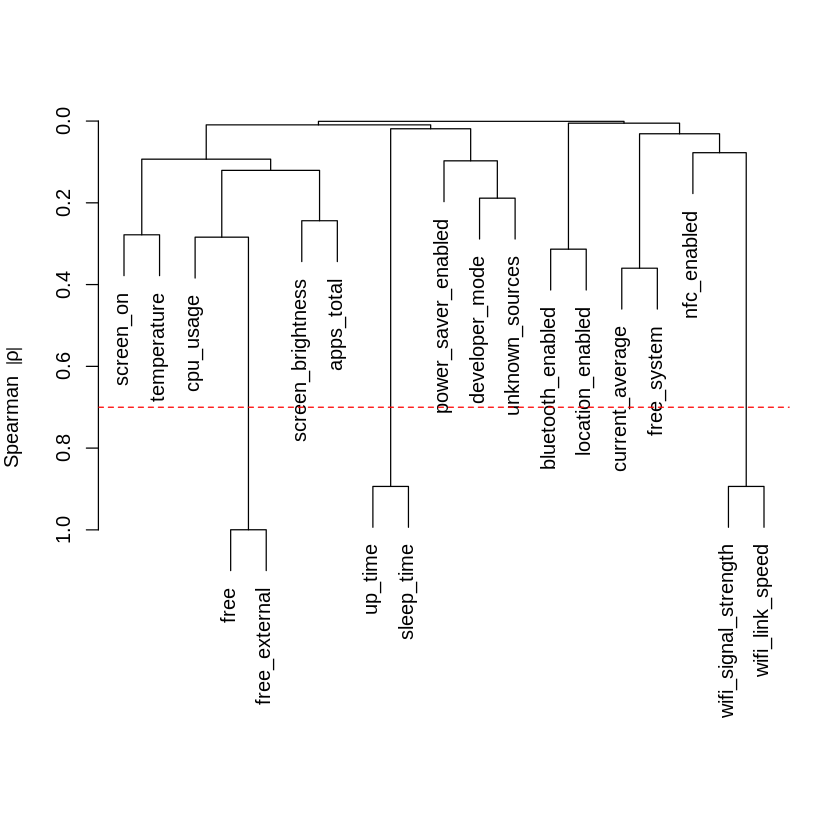

In [0]:
#Plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

Remove the highly correlated variables from `ind_vars` vector and check for highly correlated variable again until there are no variables above the threshold of *0.7*.

In [0]:
#Remove the highly correlated variables from the hierarchical clusters
reject_vars <- c('free_external', 'sleep_time','wifi_link_speed')

ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

f <- paste("~", paste0(ind_vars, collapse = "+"))

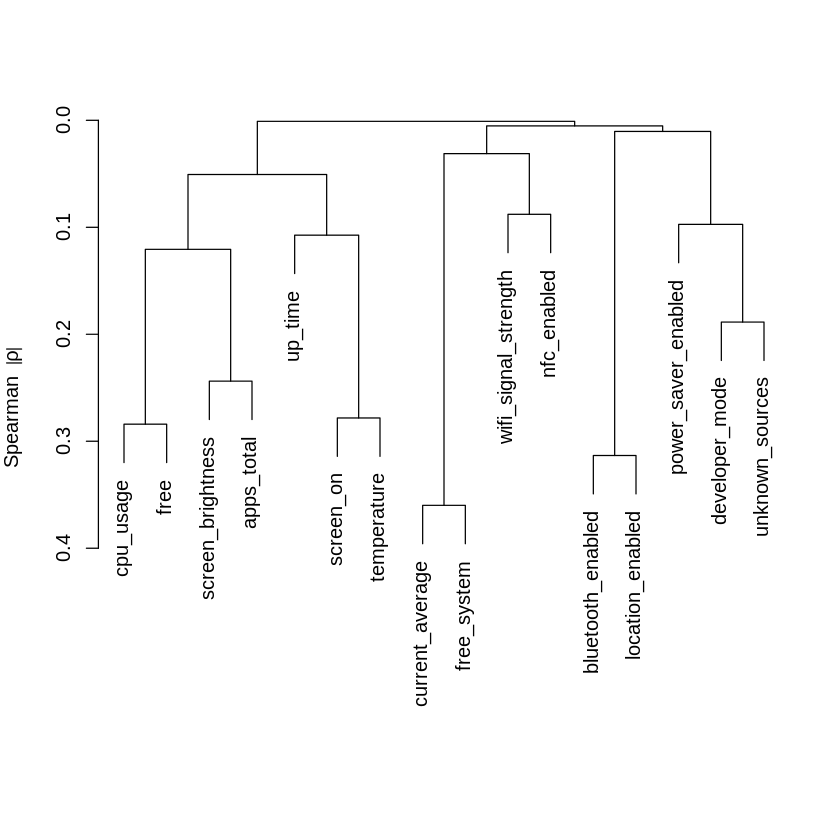

In [0]:
#Re-calculate spearman's correlation between independent variables
vc <- varclus(as.formula(f), data=data[,ind_vars], trans="abs")

#Re-plot hierarchical clusters and the spearman's correlation threshold of 0.7
plot(vc)
threshold <- 0.7
abline(h=1-threshold, col = "red", lty = 2)

#### **(MC-2.b)** Redundancy analysis step lists the explanatory variables where models are fit with an R^2 value greater than 0.9. Then, we remove these variable from `ind_vars` vector**

In [0]:
red <- redun(~., data=data[,ind_vars], nk=0) 
print(red)


Redundancy Analysis

redun(formula = ~., data = data[, ind_vars], nk = 0)

n: 650575 	p: 16 	nk: 0 

Number of NAs:	 0 

Transformation of target variables forced to be linear

R-squared cutoff: 0.9 	Type: ordinary 

R^2 with which each variable can be predicted from all other variables:

   screen_brightness            screen_on      current_average 
               0.097                0.190                0.197 
         temperature wifi_signal_strength            cpu_usage 
               0.125                0.036                0.066 
             up_time    bluetooth_enabled     location_enabled 
               0.028                0.135                0.196 
 power_saver_enabled          nfc_enabled       developer_mode 
               0.086                0.079                0.071 
     unknown_sources                 free          free_system 
               0.118                0.124                0.055 
          apps_total 
               0.186 

No redundant variables



In [0]:
reject_vars <- red$Out
ind_vars <- ind_vars[!(ind_vars %in% reject_vars)]

Set a data distribution for building the model.

In [0]:
#Merge numerical, categorical and contextual variables for model building
ind_vars <- c(ind_vars, cat_vars, ctx_vars)

Measure and plot the Spearman multiple rho^2 between each surviving variable in the `ind_vars` vector and the responses.

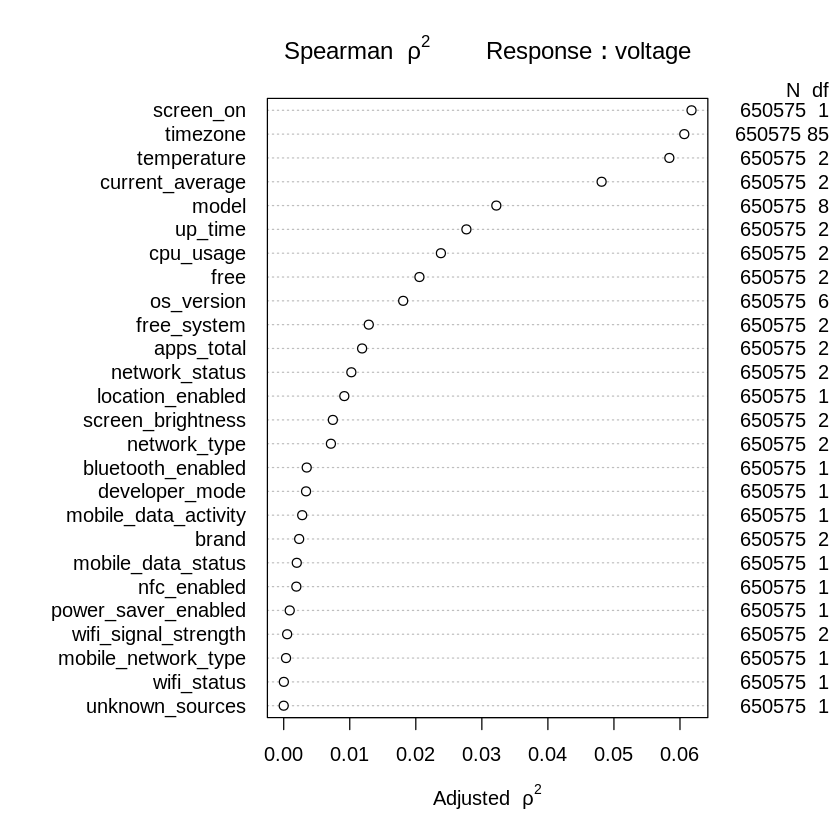

In [0]:
sp <- spearman2(formula(paste("voltage" ," ~ ", paste0(ind_vars, collapse=" + "))), data=data, p=2)
plot(sp)

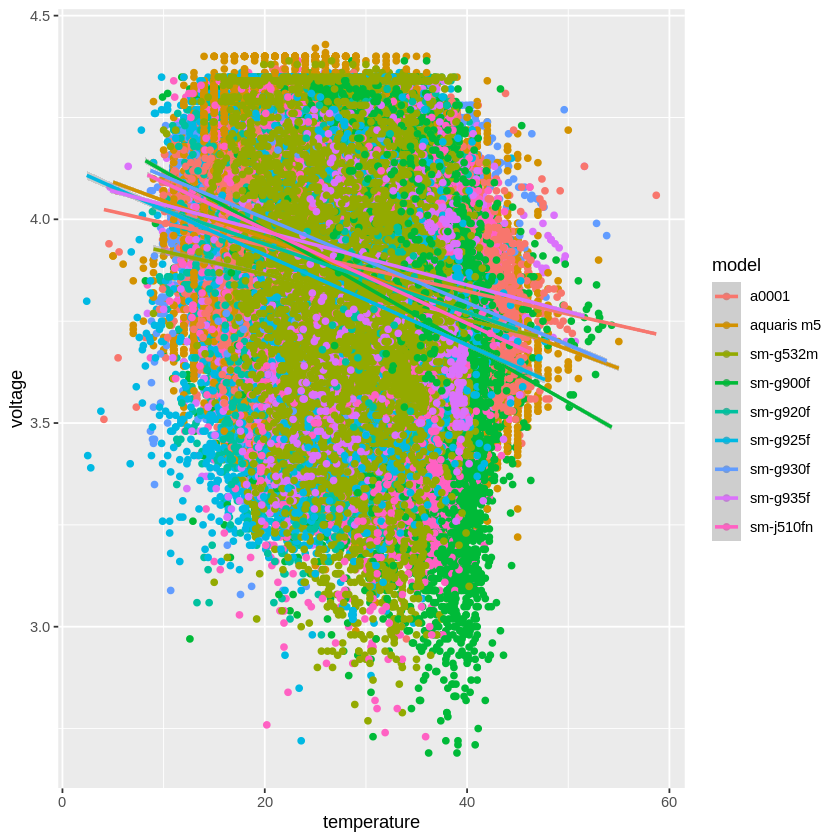

In [0]:
ggplot(data, aes(x = temperature, y = voltage, color = model)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)